### Load library and import data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [3]:
churn=pd.read_excel("Churn Data.xlsx", sheet_name='Data for DSBA')

### Inspect the data

In [4]:
churn.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [1]:
churn.info()

NameError: name 'churn' is not defined

There are 19 variables, where AccountID - unique identifier is not needed for the analysis (we could remove it)
Looking at the data in the head function and in info, we know that many variables are of float data type instead of the object and vice versa. So we will convert it into the dtype float or object.
Also, there are some invalid values like @@ and ‘*’ in the data which we will be treating as missing values.

churn.groupby('AccountID').size().value_counts()

# EDA

### Removing unwanted variables

In [6]:
# remove the variables and check the data for the 10 rows 
churn = churn.drop(['AccountID'], axis=1)

In [7]:
#churn.head()

### Summary

In [8]:
churn.describe(include="all")

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
count,11260.000000,11158.0,11148.000000,11158.000000,11151,11152,11162.000000,11148.0,11163,11144.000000,11048,11158.0,10903.000000,11260.0,11260.0,10903.0,10789.00,11039
unique,NaN,38.0,NaN,NaN,5,4,NaN,7.0,7,NaN,3,59.0,NaN,20.0,20.0,24.0,5693.00,3
top,NaN,1.0,NaN,NaN,Debit Card,Male,NaN,4.0,Super,NaN,Married,3.0,NaN,14.0,1.0,3.0,155.62,Mobile
freq,NaN,1351.0,NaN,NaN,4587,6328,NaN,4569.0,4062,NaN,5860,1746.0,NaN,1524.0,4373.0,1816.0,10.00,7482
mean,0.168384,NaN,1.653929,17.867091,NaN,NaN,2.902526,NaN,NaN,3.066493,NaN,NaN,0.285334,NaN,NaN,NaN,NaN,NaN
std,0.374223,NaN,0.915015,8.853269,NaN,NaN,0.725584,NaN,NaN,1.379772,NaN,NaN,0.451594,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,1.000000,4.000000,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,0.000000,NaN,1.000000,11.000000,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,0.000000,NaN,1.000000,16.000000,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,0.000000,NaN,3.000000,23.000000,NaN,NaN,3.000000,NaN,NaN,4.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN


In [9]:
churn.shape

(11260, 18)

### Proportion of observations in Target classes

In [10]:
# Get the proportions
churn['Churn'].value_counts(normalize=True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

In [11]:
churn['Churn'].dtype

dtype('int64')

Converting Churn into an Object

In [12]:
churn.Churn= churn.Churn.astype(object) 

In [13]:
churn['Churn'].dtype

dtype('O')

In [297]:
churn['Churn'].value_counts()

0    9104
1    1842
Name: Churn, dtype: int64

### Checking for Missing values

In [14]:
# Are there any missing values ?
churn.isnull().sum()

Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

# checking for Inconsistencies for each variable / Univariate Analysis

In [15]:
print(churn.groupby('Tenure')['Churn'].value_counts(normalize=True))

Tenure  Churn
0       1        0.543461
        0        0.456539
1       0        0.504071
        1        0.495929
2       0        0.909605
                   ...   
61      0        1.000000
99      0        0.816794
        1        0.183206
#       0        0.784483
        1        0.215517
Name: Churn, Length: 62, dtype: float64


#print("Summary of Uni-variate - Tenure\n",churn.Tenure.describe())
#churn.Tenure.value_counts()

In [16]:
churn.Tenure.dtype

dtype('O')

Datatype inconsistency as well as special symbols need to be converted here

In [17]:
churn['Tenure'] = churn['Tenure'].replace('#', np.NaN)

In [18]:
churn['Tenure'] = churn['Tenure'].astype(float)

In [19]:
churn.Tenure.dtype

dtype('float64')

In [20]:
churn.Tenure.isnull().sum() #102 + 116

218

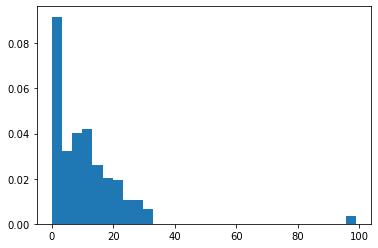

In [21]:
plt.hist(churn.Tenure, density=True, bins=30)
plt.show()

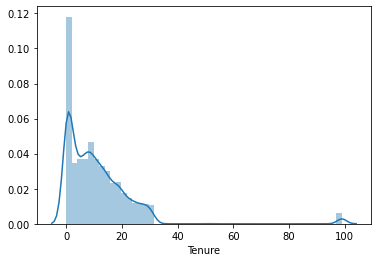

In [22]:
sns.distplot(churn.Tenure)
plt.show()

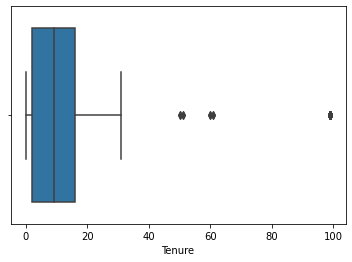

In [23]:
sns.boxplot(x='Tenure', data=churn)

In [24]:
#Normality test
from scipy import stats
s, p = stats.shapiro(churn.Tenure)
print("Ststistics:",s)
print("p-value:",p)

alpha = 0.05
if p > alpha:
    print("Passed normality test")
else:
    print("Fails to pass normality test")
print("Data does not follows normal distribution")

Ststistics: nan
p-value: 1.0
Passed normality test
Data does not follows normal distribution


In [25]:
churn.Tenure.fillna(churn.Tenure.median(), inplace=True)

In [26]:
churn.Tenure.isnull().sum()

0

In [27]:
churn.Tenure.dtype

dtype('float64')

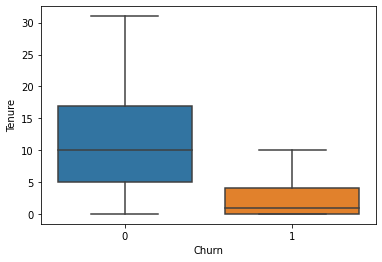

In [28]:
sns.boxplot(x='Churn',y='Tenure', data=churn,sym="")

Customers with more tenure periods are non-churners whereas with less tenure periods are churners. Apart from this, churned customers tenure has no left whisker indicating that, (for at least 25% of the periods) customers decided quickly to
churn.

#sns.boxplot(x='Churn',y='Tenure', hue='Complain_ly', data=churn,sym="")

#City-Tier

#print("Summary of Uni-variate - City_Tier\n",churn.City_Tier.describe())

In [29]:
print(churn.groupby('City_Tier')['Churn'].value_counts())

City_Tier  Churn
1.0        0        6207
           1        1056
2.0        0         384
           1          96
3.0        0        2678
           1         727
Name: Churn, dtype: int64


In [30]:
churn.City_Tier.dtype

dtype('float64')

In [31]:
churn['City_Tier'] = churn['City_Tier'].astype(object)

In [32]:
#churn.City_Tier.value_counts()
churn.City_Tier.dtype

dtype('O')

churn.info()

In [33]:
churn.City_Tier.isnull().sum()

112

In [34]:
mode = churn['City_Tier'].mode()    

In [35]:
mode

0    1
dtype: object

In [36]:
churn['City_Tier'] = churn['City_Tier'].fillna(mode[0])

In [37]:
churn.City_Tier.isnull().sum()

0

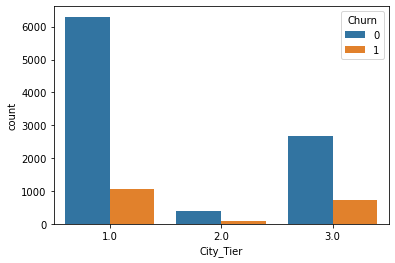

In [38]:
sns.countplot(x='City_Tier',hue='Churn',data=churn)

City_Tier 1 has more number of non-churners as well as churners followed by City_Tier 3 and 2.

#CC_Contacted_LY

In [39]:
print(churn.groupby('CC_Contacted_LY')['Churn'].value_counts())

CC_Contacted_LY  Churn
4.0              1          1
5.0              0          7
                 1          1
6.0              0        270
                 1         41
                         ... 
43.0             1          2
126.0            0          1
127.0            0          1
129.0            0          1
132.0            0          1
Name: Churn, Length: 83, dtype: int64


#print("Summary of Uni-variate - CC_Contacted_LY\n",churn.CC_Contacted_LY.describe())
#churn.CC_Contacted_LY.value_counts()

In [40]:
churn.CC_Contacted_LY.dtype

dtype('float64')

In [41]:
churn.CC_Contacted_LY.isnull().sum()

102

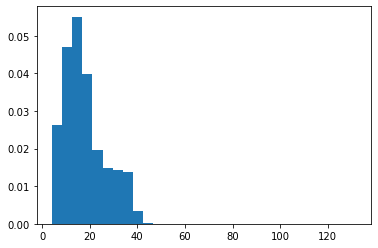

In [42]:
plt.hist(churn.CC_Contacted_LY, density=True, bins=30)
plt.show()

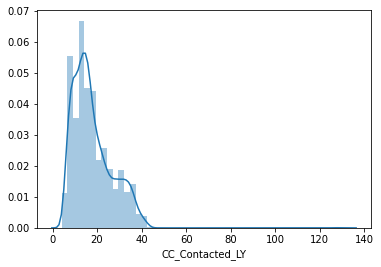

In [43]:
sns.distplot(churn.CC_Contacted_LY)
plt.show()

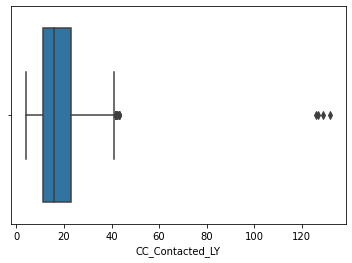

In [44]:
sns.boxplot(x='CC_Contacted_LY', data=churn)

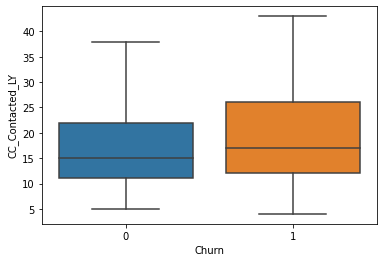

In [45]:
sns.boxplot(x='Churn',y='CC_Contacted_LY', data=churn,sym="")

Churners has contacted customer care more number of times than non-churners

In [46]:
churn.CC_Contacted_LY.fillna(churn.CC_Contacted_LY.median(), inplace=True)

In [47]:
churn.CC_Contacted_LY.isnull().sum()

0

In [48]:
#Normality test
from scipy import stats
s, p = stats.shapiro(churn.CC_Contacted_LY)
print("Ststistics:",s)
print("p-value:",p)

alpha = 0.05
if p > alpha:
    print("Passed normality test")
else:
    print("Fails to pass normality test")
print("Data does not follows normal distribution")

Ststistics: 0.9000175595283508
p-value: 0.0
Fails to pass normality test
Data does not follows normal distribution


#Payment

In [49]:
print(churn.groupby('Payment')['Churn'].value_counts())

Payment           Churn
Cash on Delivery  0         760
                  1         254
Credit Card       0        3012
                  1         499
Debit Card        0        3885
                  1         702
E wallet          0         941
                  1         276
UPI               0         679
                  1         143
Name: Churn, dtype: int64


Debit card based cusotmers are likely to have more number of churners as well as non-churners

#print("Summary of Uni-variate - Payment\n",churn.Payment.describe())
#churn.Payment.value_counts()

In [50]:
churn.Payment.dtype

dtype('O')

In [51]:
churn.Payment.isnull().sum()

109

In [52]:
mode=churn['Payment'].mode()

In [53]:
churn['Payment'] = churn['Payment'].fillna(mode[0])

In [54]:
churn.Payment.isnull().sum()

0

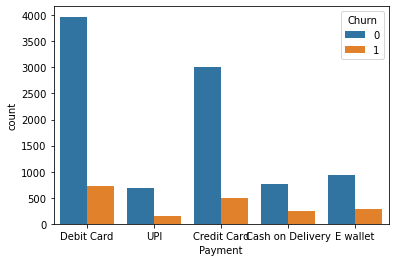

In [55]:
sns.countplot(x='Payment',hue='Churn',data=churn)

More number of customers are debit card users followed by credit card. Also, debit card users churn more than other type of users

#Gender

In [56]:
print(churn.groupby('Gender')['Churn'].value_counts())

Gender  Churn
F       0         232
        1          38
Female  0        3527
        1         651
M       0         298
        1          78
Male    0        5221
        1        1107
Name: Churn, dtype: int64


print("Summary of Uni-variate - Gender\n",churn.Gender.describe())
churn['Gender'].value_counts()

In [57]:
churn['Gender'] = churn['Gender'].str.replace('Female', 'F')

In [58]:
churn['Gender'] = churn['Gender'].str.replace('Male', 'M')

In [59]:
print(churn.groupby('Gender')['Churn'].value_counts())

Gender  Churn
F       0        3759
        1         689
M       0        5519
        1        1185
Name: Churn, dtype: int64


In [60]:
churn['Gender'].dtype

dtype('O')

In [61]:
churn.Gender.isnull().sum()

108

In [62]:
mode=churn['Gender'].mode()
churn['Gender'] = churn['Gender'].fillna(mode[0])

In [63]:
churn.Gender.isnull().sum()

0

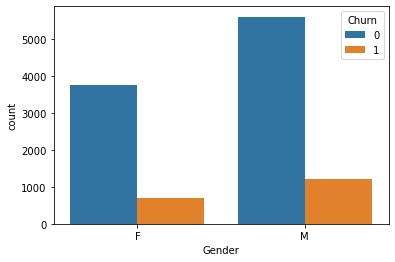

In [64]:
sns.countplot(x='Gender',hue='Churn',data=churn)

Maximum churners and non-churners are of Gender 'Male'

#Service_Score

In [65]:
print(churn.groupby('Service_Score')['Churn'].value_counts())

Service_Score  Churn
0.0            0           8
1.0            0          77
2.0            0        2701
               1         550
3.0            0        4554
               1         936
4.0            0        1937
               1         394
5.0            0           5
Name: Churn, dtype: int64


#print("Summary of Uni-variate - Service_Score\n",churn.Service_Score.describe())
#churn['Service_Score'].value_counts()

In [66]:
churn['Service_Score'].dtype

dtype('float64')

In [67]:
churn.Service_Score= churn.Service_Score.astype(object) 

In [68]:
churn.Service_Score.isnull().sum()

98

In [69]:
mode = churn['Service_Score'].mode()   
#mode

In [70]:
churn['Service_Score'] = churn['Service_Score'].fillna(mode[0])

In [71]:
churn.Service_Score.isnull().sum()

0

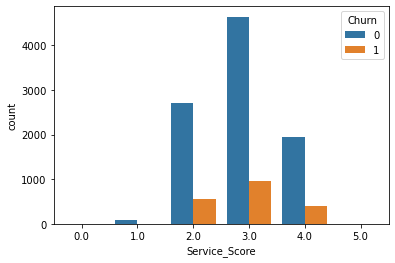

In [72]:
sns.countplot(x='Service_Score',hue='Churn',data=churn)

Service score 3 given by customers have maximum number of churners as well as non-churners and score 0 and 5 
is given only by few non-churners.

#Account_user_count

Tags may contain customer praise or positive mentions, but are also a way for dissatisfied
customers to air their grievances in a public forum.

In [73]:
print(churn.groupby('Account_user_count')['Churn'].value_counts())

Account_user_count  Churn
1                   0         402
                    1          44
2                   0         478
                    1          48
3                   0        2772
                    1         489
4                   0        3811
                    1         758
5                   0        1317
                    1         382
6                   0         206
                    1         109
@                   0         285
                    1          47
Name: Churn, dtype: int64


#print("Summary of Uni-variate - Account_user_count\n",churn.Account_user_count.describe())
churn.Account_user_count.value_counts()

In [74]:
churn.Account_user_count.dtype

dtype('O')

In [75]:
churn['Account_user_count'] = churn['Account_user_count'].replace('@', np.NaN)

In [76]:
churn.Account_user_count.isnull().sum()

444

In [77]:
mode=churn['Account_user_count'].mode()
churn['Account_user_count'] = churn['Account_user_count'].fillna(mode[0])

In [78]:
churn.Account_user_count.isnull().sum()

0

In [79]:
print(churn.groupby('Account_user_count')['Churn'].value_counts(normalize=True))

Account_user_count  Churn
1.0                 0        0.901345
                    1        0.098655
2.0                 0        0.908745
                    1        0.091255
3.0                 0        0.850046
                    1        0.149954
4.0                 0        0.835627
                    1        0.164373
5.0                 0        0.775162
                    1        0.224838
6.0                 0        0.653968
                    1        0.346032
Name: Churn, dtype: float64


If the customer has more than 2 tags with their account, it seems that their churn percentage is increasing.

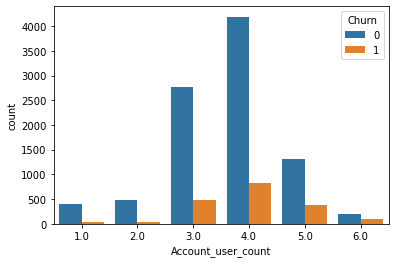

In [80]:
sns.countplot(x='Account_user_count',hue='Churn',data=churn)

#account_segment

In [81]:
print(churn.groupby('account_segment')['Churn'].value_counts())

account_segment  Churn
HNI              0        1384
                 1         255
Regular          0         480
                 1          40
Regular +        0         195
                 1          67
Regular Plus     0        2802
                 1        1060
Super            0        3646
                 1         416
Super +          0          46
                 1           1
Super Plus       0         732
                 1          39
Name: Churn, dtype: int64


#print("Summary of Uni-variate - account_segment\n",churn.account_segment.describe())
#churn.account_segment.value_counts()

In [82]:
churn.account_segment.dtype

dtype('O')

In [83]:
churn['account_segment'] = churn['account_segment'].str.replace('+', 'Plus')

In [84]:
print(churn.groupby('account_segment')['Churn'].value_counts())

account_segment  Churn
HNI              0        1384
                 1         255
Regular          0         480
                 1          40
Regular Plus     0        2997
                 1        1127
Super            0        3646
                 1         416
Super Plus       0         778
                 1          40
Name: Churn, dtype: int64


In [85]:
churn.account_segment.isnull().sum()

97

In [86]:
mode=churn['account_segment'].mode()
churn['account_segment'] = churn['account_segment'].fillna(mode[0])

In [87]:
churn.account_segment.isnull().sum()

0

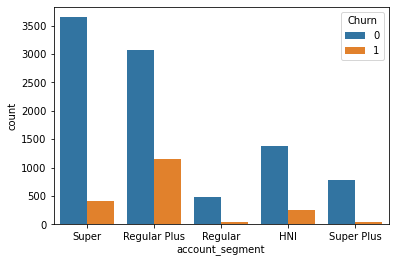

In [88]:
sns.countplot(x='account_segment',hue='Churn',data=churn)

Account segment customers of type 'Super' and 'Regular Plus' are tend to spend to more. Also, 'Regular Plus' customers
have more % of churners than other segment types. 

#CC_Agent_Score

In [89]:
print(churn.groupby('CC_Agent_Score')['Churn'].value_counts())

CC_Agent_Score  Churn
1.0             0        2038
                1         264
2.0             0        1017
                1         147
3.0             0        2783
                1         577
4.0             0        1763
                1         364
5.0             0        1669
                1         522
Name: Churn, dtype: int64


#print("Summary of Uni-variate - CC_Agent_Score\n",churn.CC_Agent_Score.describe())
#churn.CC_Agent_Score.value_counts()

In [90]:
churn.CC_Agent_Score.dtype

dtype('float64')

In [91]:
churn['CC_Agent_Score'] = churn['CC_Agent_Score'].astype(object)

In [92]:
churn.CC_Agent_Score.dtype

dtype('O')

In [93]:
churn.CC_Agent_Score.isnull().sum()

116

In [94]:
mode=churn['CC_Agent_Score'].mode()
churn['CC_Agent_Score'] = churn['CC_Agent_Score'].fillna(mode[0])

In [95]:
churn.CC_Agent_Score.isnull().sum()

0

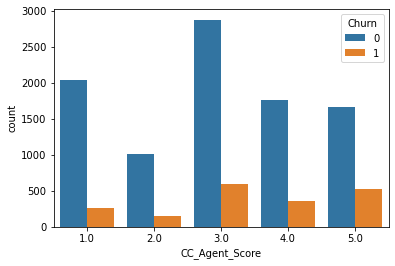

In [96]:
sns.countplot(x='CC_Agent_Score',hue='Churn',data=churn)

CC_Agent_score 3 given by customer care have maximum number of churners 
as well as non-churners and score 2 is given only by less number of non-churners.

#Marital_Status

In [97]:
print(churn.groupby('Marital_Status')['Churn'].value_counts())

Marital_Status  Churn
Divorced        0        1424
                1         244
Married         0        5187
                1         673
Single          0        2573
                1         947
Name: Churn, dtype: int64


#print("Summary of Uni-variate - Marital_Status\n",churn.Marital_Status.describe())
#churn.Marital_Status.value_counts()

In [98]:
churn.Marital_Status.dtype

dtype('O')

In [99]:
churn.Marital_Status.isnull().sum()

212

In [100]:
mode=churn['Marital_Status'].mode()
churn['Marital_Status'] = churn['Marital_Status'].fillna(mode[0])

In [101]:
churn.Marital_Status.isnull().sum()

0

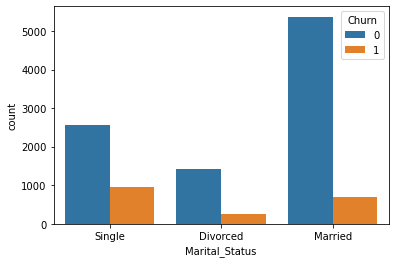

In [102]:
sns.countplot(x='Marital_Status',hue='Churn',data=churn)

Customers who are 'married' are in more number and also they are the majority of non-churners. Compared to other Marital_status,
'Single' type of customers are likely to churn more.

#rev_per_month

In [103]:
print(churn.groupby('rev_per_month')['Churn'].value_counts())

rev_per_month  Churn
1              0         354
               1          48
2              0        1315
               1         270
3              0        1447
                        ... 
138            1           1
139            0           2
140            0           4
+              0         584
               1         105
Name: Churn, Length: 89, dtype: int64


#print("Summary of Uni-variate - rev_per_month\n",churn.rev_per_month.describe())
#churn.rev_per_month.value_counts()

In [104]:
churn['rev_per_month'] = churn['rev_per_month'].replace('+', np.NaN)

In [105]:
churn['rev_per_month'].dtype

dtype('float64')

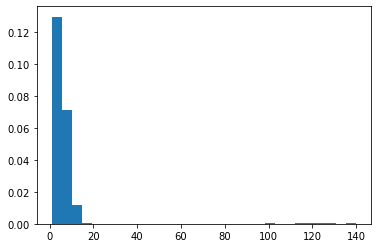

In [106]:
plt.hist(churn['rev_per_month'], density=True, bins=30)
plt.show()

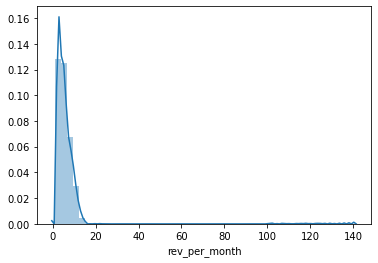

In [107]:
sns.distplot(churn['rev_per_month'])
plt.show()

In [108]:
churn['rev_per_month'].isnull().sum()

791

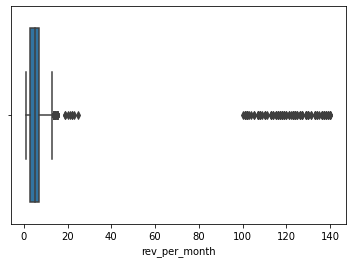

In [109]:
sns.boxplot(x='rev_per_month', data=churn)

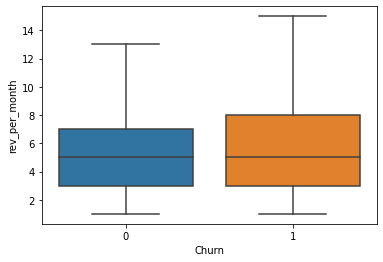

In [110]:
sns.boxplot(x='Churn',y='rev_per_month', data=churn,sym="")

It seems churners have comparaatively more number of monthly average revenue generated than non-churners

In [111]:
churn.rev_per_month.fillna(churn.rev_per_month.median(), inplace=True)

In [112]:
churn['rev_per_month'].isnull().sum()

0

In [113]:
#Normality test
from scipy import stats
s, p = stats.shapiro(churn.rev_per_month)
print("Ststistics:",s)
print("p-value:",p)

alpha = 0.05
if p > alpha:
    print("Passed normality test")
else:
    print("Fails to pass normality test")
print("Data does not follows normal distribution")

Ststistics: 0.23160076141357422
p-value: 0.0
Fails to pass normality test
Data does not follows normal distribution


#Complain_ly

In [114]:
print(churn.groupby('Complain_ly')['Churn'].value_counts())

Complain_ly  Churn
0.0          0        6942
             1         850
1.0          0        2123
             1         988
Name: Churn, dtype: int64


#print("Summary of Uni-variate - Complain_ly\n",churn.Complain_ly.describe())
#churn.Complain_ly.value_counts()

In [115]:
churn.Complain_ly.dtype

dtype('float64')

In [116]:
churn['Complain_ly'] = churn['Complain_ly'].astype(object)

In [117]:
churn.Complain_ly.dtype

dtype('O')

In [118]:
churn.Complain_ly.isnull().sum()

357

In [119]:
mode=churn['Complain_ly'].mode()
churn['Complain_ly'] = churn['Complain_ly'].fillna(mode[0])

In [120]:
churn.Complain_ly.isnull().sum()

0

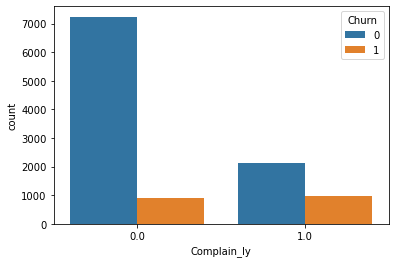

In [121]:
sns.countplot(x='Complain_ly',hue='Churn',data=churn)

Not more number of complaints are raised by customers in the last 12 months. However, those who are complaining, nearly 
50% of them are churners.

In [122]:
#rev_growth_yoy

In [123]:
print(churn.groupby('rev_growth_yoy')['Churn'].value_counts())

rev_growth_yoy  Churn
4               0           2
                1           1
11              0         418
                1         105
12              0         985
                1         225
13              0        1157
                1         270
14              0        1283
                1         241
15              0        1105
                1         178
16              0         782
                1         167
17              0         574
                1         130
18              0         593
                1         115
19              0         533
                1          86
20              0         486
                1          76
21              0         378
                1          55
22              0         337
                1          66
23              0         275
                1          70
24              0         177
                1          52
25              0         145
                1          43
26              0 

#print("Summary of Uni-variate - rev_growth_yoy\n",churn.rev_growth_yoy.describe())
#churn.rev_growth_yoy.value_counts()

In [124]:
churn['rev_growth_yoy'] = churn['rev_growth_yoy'].replace('$', np.NaN)

In [125]:
churn.rev_growth_yoy.dtype 

dtype('float64')

In [126]:
churn.rev_growth_yoy.isnull().sum()

3

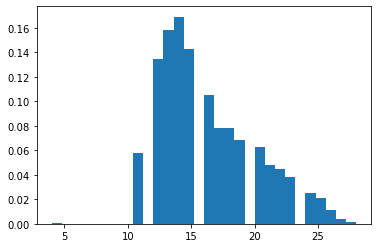

In [127]:
plt.hist(churn.rev_growth_yoy, density=True, bins=30)
plt.show()

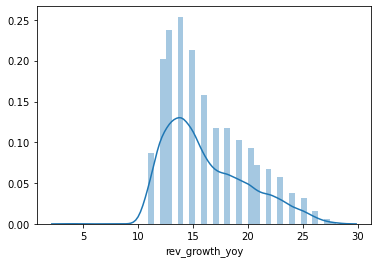

In [128]:
sns.distplot(churn.rev_growth_yoy)
plt.show()

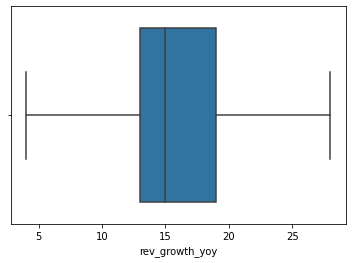

In [129]:
sns.boxplot(x='rev_growth_yoy', data=churn)

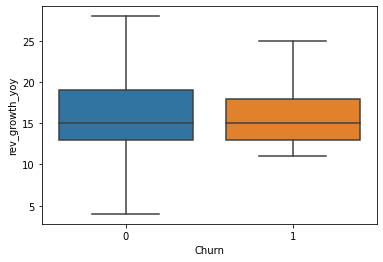

In [130]:
sns.boxplot(x='Churn',y='rev_growth_yoy', data=churn,sym="")

Revenue growth % of churners are in the higher range and also the median value of churners as well as non-churners
are nearly equal.

In [131]:
churn.rev_growth_yoy.fillna(churn.rev_growth_yoy.median(), inplace=True)

In [132]:
churn.rev_growth_yoy.isnull().sum()

0

In [133]:
#Normality test
from scipy import stats
s, p = stats.shapiro(churn.rev_growth_yoy)
print("Ststistics:",s)
print("p-value:",p)

alpha = 0.05
if p > alpha:
    print("Passed normality test")
else:
    print("Fails to pass normality test")
print("Data does not follows normal distribution")

Ststistics: 0.929279088973999
p-value: 0.0
Fails to pass normality test
Data does not follows normal distribution


#coupon_used_for_payment

In [134]:
print(churn.groupby('coupon_used_for_payment')['Churn'].value_counts())

coupon_used_for_payment  Churn
0                        0        1776
                         1         374
1                        0        3613
                         1         760
2                        0        2210
                         1         446
3                        0         602
                         1          96
4                        0         362
                         1          62
5                        0         238
                         1          46
6                        0         198
                         1          36
7                        0         148
                         1          36
8                        0          68
                         1          20
9                        0          30
                         1           4
10                       0          28
                         1           6
11                       0          26
                         1           4
12                       0       

#print("Summary of Uni-variate - coupon_used_for_payment\n",churn.coupon_used_for_payment.describe())
#churn.coupon_used_for_payment.value_counts()

In [135]:
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].replace('#', np.NaN)
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].replace('$', np.NaN)
churn['coupon_used_for_payment'] = churn['coupon_used_for_payment'].replace('*', np.NaN)

In [136]:
churn.coupon_used_for_payment.dtype

dtype('float64')

In [137]:
churn.coupon_used_for_payment.isnull().sum()

3

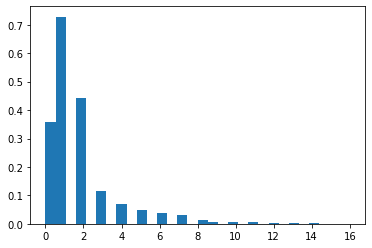

In [138]:
plt.hist(churn.coupon_used_for_payment, density=True, bins=30)
plt.show()

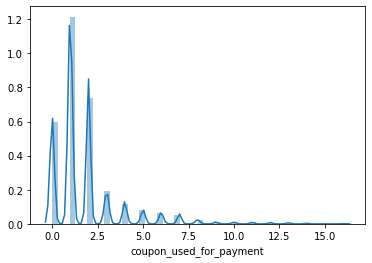

In [139]:
sns.distplot(churn.coupon_used_for_payment)
plt.show()

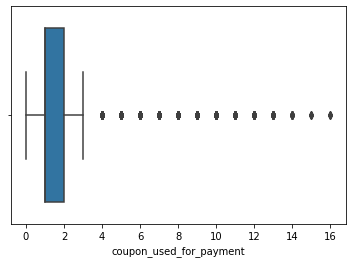

In [140]:
sns.boxplot(x='coupon_used_for_payment', data=churn)

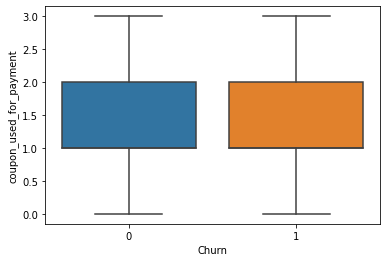

In [141]:
sns.boxplot(x='Churn',y='coupon_used_for_payment', data=churn,sym="")

Both churners and non-churners have used coupons for equal number of times to make payment

In [142]:
churn.coupon_used_for_payment.fillna(churn.coupon_used_for_payment.median(), inplace=True)

In [143]:
churn.coupon_used_for_payment.isnull().sum()

0

In [144]:
#Normality test
from scipy import stats
s, p = stats.shapiro(churn.coupon_used_for_payment)
print("Ststistics:",s)
print("p-value:",p)

alpha = 0.05
if p > alpha:
    print("Passed normality test")
else:
    print("Fails to pass normality test")
print("Data does not follows normal distribution")

Ststistics: 0.7224891185760498
p-value: 0.0
Fails to pass normality test
Data does not follows normal distribution


#Day_Since_CC_connect

In [145]:
print(churn.groupby('Day_Since_CC_connect')['Churn'].value_counts())

Day_Since_CC_connect  Churn
0                     0         638
                      1         326
1                     0         880
                      1         376
2                     0        1339
                      1         235
3                     0        1551
                      1         265
4                     0         777
                      1         116
5                     0         424
                      1          55
6                     0         197
                      1          32
7                     0         776
                      1         135
8                     0        1012
                      1         157
9                     0         558
                      1          64
10                    0         305
                      1          34
11                    0         167
                      1          16
12                    0         143
                      1           3
13                    0         117


#print("Summary of Uni-variate - Day_Since_CC_connect\n",churn.Day_Since_CC_connect.describe())
#churn.Day_Since_CC_connect.value_counts()

In [146]:
churn['Day_Since_CC_connect'] = churn['Day_Since_CC_connect'].replace('$', np.NaN)

In [147]:
churn.Day_Since_CC_connect.dtype

dtype('float64')

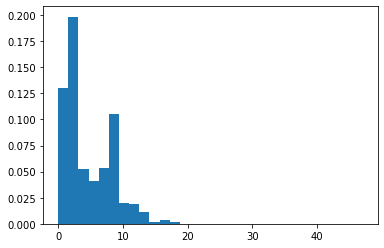

In [148]:
plt.hist(churn.Day_Since_CC_connect, density=True, bins=30)
plt.show()

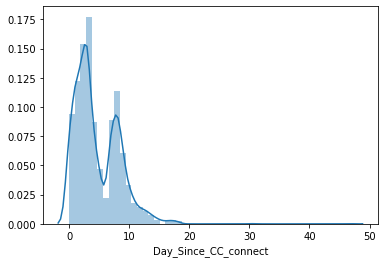

In [149]:
sns.distplot(churn.Day_Since_CC_connect)
plt.show()

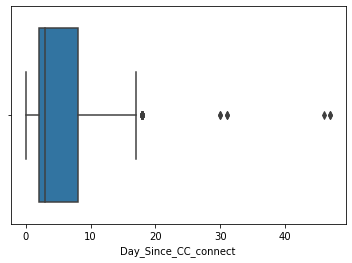

In [150]:
sns.boxplot(x='Day_Since_CC_connect', data=churn)

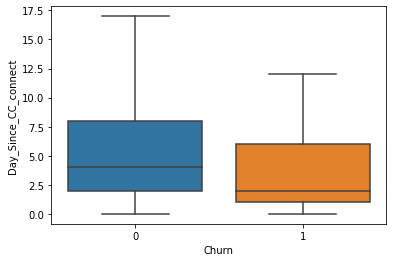

In [151]:
sns.boxplot(x='Churn',y='Day_Since_CC_connect', data=churn,sym="")

Customers who tend to churn are quite fast in taking decisions in spite of contacting or not contacting the customer care.

In [152]:
churn.Day_Since_CC_connect.fillna(churn.Day_Since_CC_connect.median(), inplace=True)

In [153]:
churn.Day_Since_CC_connect.isnull().sum()

0

In [154]:
#Normality test
from scipy import stats
s, p = stats.shapiro(churn.Day_Since_CC_connect)
print("Ststistics:",s)
print("p-value:",p)

alpha = 0.05
if p > alpha:
    print("Passed normality test")
else:
    print("Fails to pass normality test")
print("Data does not follows normal distribution")

Ststistics: 0.8930234313011169
p-value: 0.0
Fails to pass normality test
Data does not follows normal distribution


#cashback

In [155]:
print(churn.groupby('cashback')['Churn'].value_counts())

cashback  Churn
0         0        4
2         0        1
3         0        1
4         0        1
5         0        1
                  ..
1985      0        1
1991      0        1
1992      0        1
1997      1        1
$         0        2
Name: Churn, Length: 6165, dtype: int64


#print("Summary of Uni-variate - cashback\n",churn.cashback.describe())
#churn.cashback.value_counts()

In [156]:
churn['cashback'] = churn['cashback'].replace('$', np.NaN)

In [157]:
churn['cashback'] = churn['cashback'].astype(float)

In [158]:
churn.cashback.dtype

dtype('float64')

In [159]:
churn.cashback.isnull().sum()

473

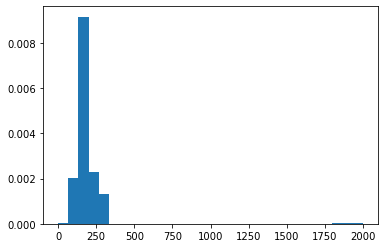

In [160]:
plt.hist(churn.cashback, density=True, bins=30)
plt.show()


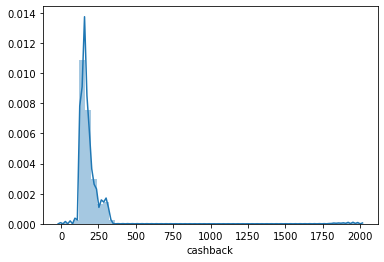

In [161]:
sns.distplot(churn.cashback)
plt.show()

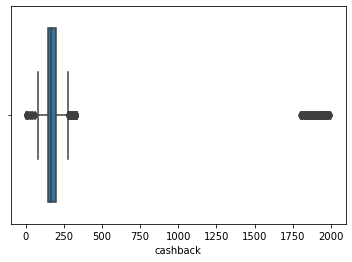

In [162]:
sns.boxplot(x='cashback', data=churn)

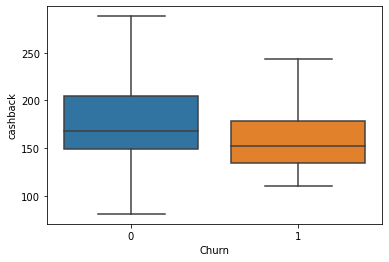

In [163]:
sns.boxplot(x='Churn',y='cashback', data=churn,sym="")

Monthly average cashback of churners is less compared to non-churners.

In [164]:
churn.cashback.fillna(churn.cashback.median(), inplace=True)

In [165]:
churn.cashback.isnull().sum()

0

In [166]:
#Normality test
from scipy import stats
s, p = stats.shapiro(churn.cashback)
print("Ststistics:",s)
print("p-value:",p)

alpha = 0.05
if p > alpha:
    print("Passed normality test")
else:
    print("Fails to pass normality test")
print("Data does not follows normal distribution")

Ststistics: 0.25007057189941406
p-value: 0.0
Fails to pass normality test
Data does not follows normal distribution


#Login_device

In [167]:
print(churn.groupby('Login_device')['Churn'].value_counts())

Login_device  Churn
&&&&          0         454
              1          85
Computer      0        2421
              1         597
Mobile        0        6310
              1        1172
Name: Churn, dtype: int64


#print("Summary of Uni-variate - Login_device\n",churn.Login_device.describe())
#churn.Login_device.value_counts()

In [168]:
churn.Login_device.dtype

dtype('O')

In [169]:
churn['Login_device'] = churn['Login_device'].replace('&&&&', np.NaN)

In [170]:
print(churn.groupby('Login_device')['Churn'].value_counts())

Login_device  Churn
Computer      0        2421
              1         597
Mobile        0        6310
              1        1172
Name: Churn, dtype: int64


Majority of the customers prefer mobile devices for login rather than computers 

In [171]:
churn.Login_device.isnull().sum()

760

In [172]:
mode=churn['Login_device'].mode()
churn['Login_device'] = churn['Login_device'].fillna(mode[0])

In [173]:
churn.Login_device.isnull().sum()

0

In [174]:
print(churn.groupby('Login_device')['Churn'].value_counts())

Login_device  Churn
Computer      0        2421
              1         597
Mobile        0        6943
              1        1299
Name: Churn, dtype: int64


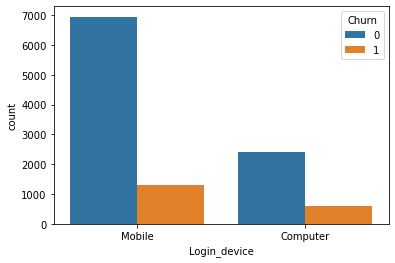

In [175]:
sns.countplot(x='Login_device',hue='Churn',data=churn)

Maximum number of customers prefer mobile device for login the account, moreover count of customers who are churners
are more in numbers compared to the count of computer device users. 

In [197]:
#Churners and Non-churners

print(churn.groupby(['Churn']).mean())

          Tenure  CC_Contacted_LY  Service_Score  Account_user_count  \
Churn                                                                  
0      11.616872        17.565795       2.899220            3.667783   
1       3.688382        19.247557       2.913681            3.924267   

       CC_Agent_Score  rev_per_month  rev_growth_yoy  coupon_used_for_payment  \
Churn                                                                           
0            2.988686       5.220123       16.236489                 1.492805   
1            3.376764       5.536374       16.070575                 1.438111   

       Day_Since_CC_connect    cashback  
Churn                                    
0                  4.803383  180.605729  
1                  3.375679  163.454799  


In [177]:
churn.duplicated().sum()

314

In [178]:
churn.drop_duplicates(inplace = True)

In [179]:
churn.duplicated().sum()

0

In [180]:
print(churn.groupby(['Churn']).std())

          Tenure  City_Tier  CC_Contacted_LY  Service_Score  \
Churn                                                         
0      12.615988   0.899908         8.802191       0.727531   
1      12.078111   0.960480         8.884377       0.700460   

       Account_user_count  CC_Agent_Score  rev_per_month  Complain_ly  \
Churn                                                                   
0                1.000460        1.372020      11.314299     0.418872   
1                0.997766        1.333259      13.117354     0.499754   

       rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  \
Churn                                                                  
0            3.740480                 1.991575              3.624582   
1            3.857935                 1.922795              3.576545   

         cashback  
Churn              
0      174.096538  
1      191.697296  


In [181]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10946 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    10946 non-null  object 
 1   Tenure                   10946 non-null  float64
 2   City_Tier                10946 non-null  float64
 3   CC_Contacted_LY          10946 non-null  float64
 4   Payment                  10946 non-null  object 
 5   Gender                   10946 non-null  object 
 6   Service_Score            10946 non-null  float64
 7   Account_user_count       10946 non-null  float64
 8   account_segment          10946 non-null  object 
 9   CC_Agent_Score           10946 non-null  float64
 10  Marital_Status           10946 non-null  object 
 11  rev_per_month            10946 non-null  float64
 12  Complain_ly              10946 non-null  float64
 13  rev_growth_yoy           10946 non-null  float64
 14  coupon_used_for_paymen

In [182]:

churn['Complain_ly'].dtype

dtype('float64')

In [183]:
churn['City_Tier'].dtype

dtype('float64')

In [184]:
churn['City_Tier'] = churn['City_Tier'].astype(object)
churn['Complain_ly'] = churn['Complain_ly'].astype(object)

In [185]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10946 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    10946 non-null  object 
 1   Tenure                   10946 non-null  float64
 2   City_Tier                10946 non-null  object 
 3   CC_Contacted_LY          10946 non-null  float64
 4   Payment                  10946 non-null  object 
 5   Gender                   10946 non-null  object 
 6   Service_Score            10946 non-null  float64
 7   Account_user_count       10946 non-null  float64
 8   account_segment          10946 non-null  object 
 9   CC_Agent_Score           10946 non-null  float64
 10  Marital_Status           10946 non-null  object 
 11  rev_per_month            10946 non-null  float64
 12  Complain_ly              10946 non-null  object 
 13  rev_growth_yoy           10946 non-null  float64
 14  coupon_used_for_paymen

# Univariate Analysis - after imputing missing values - before treating outliers

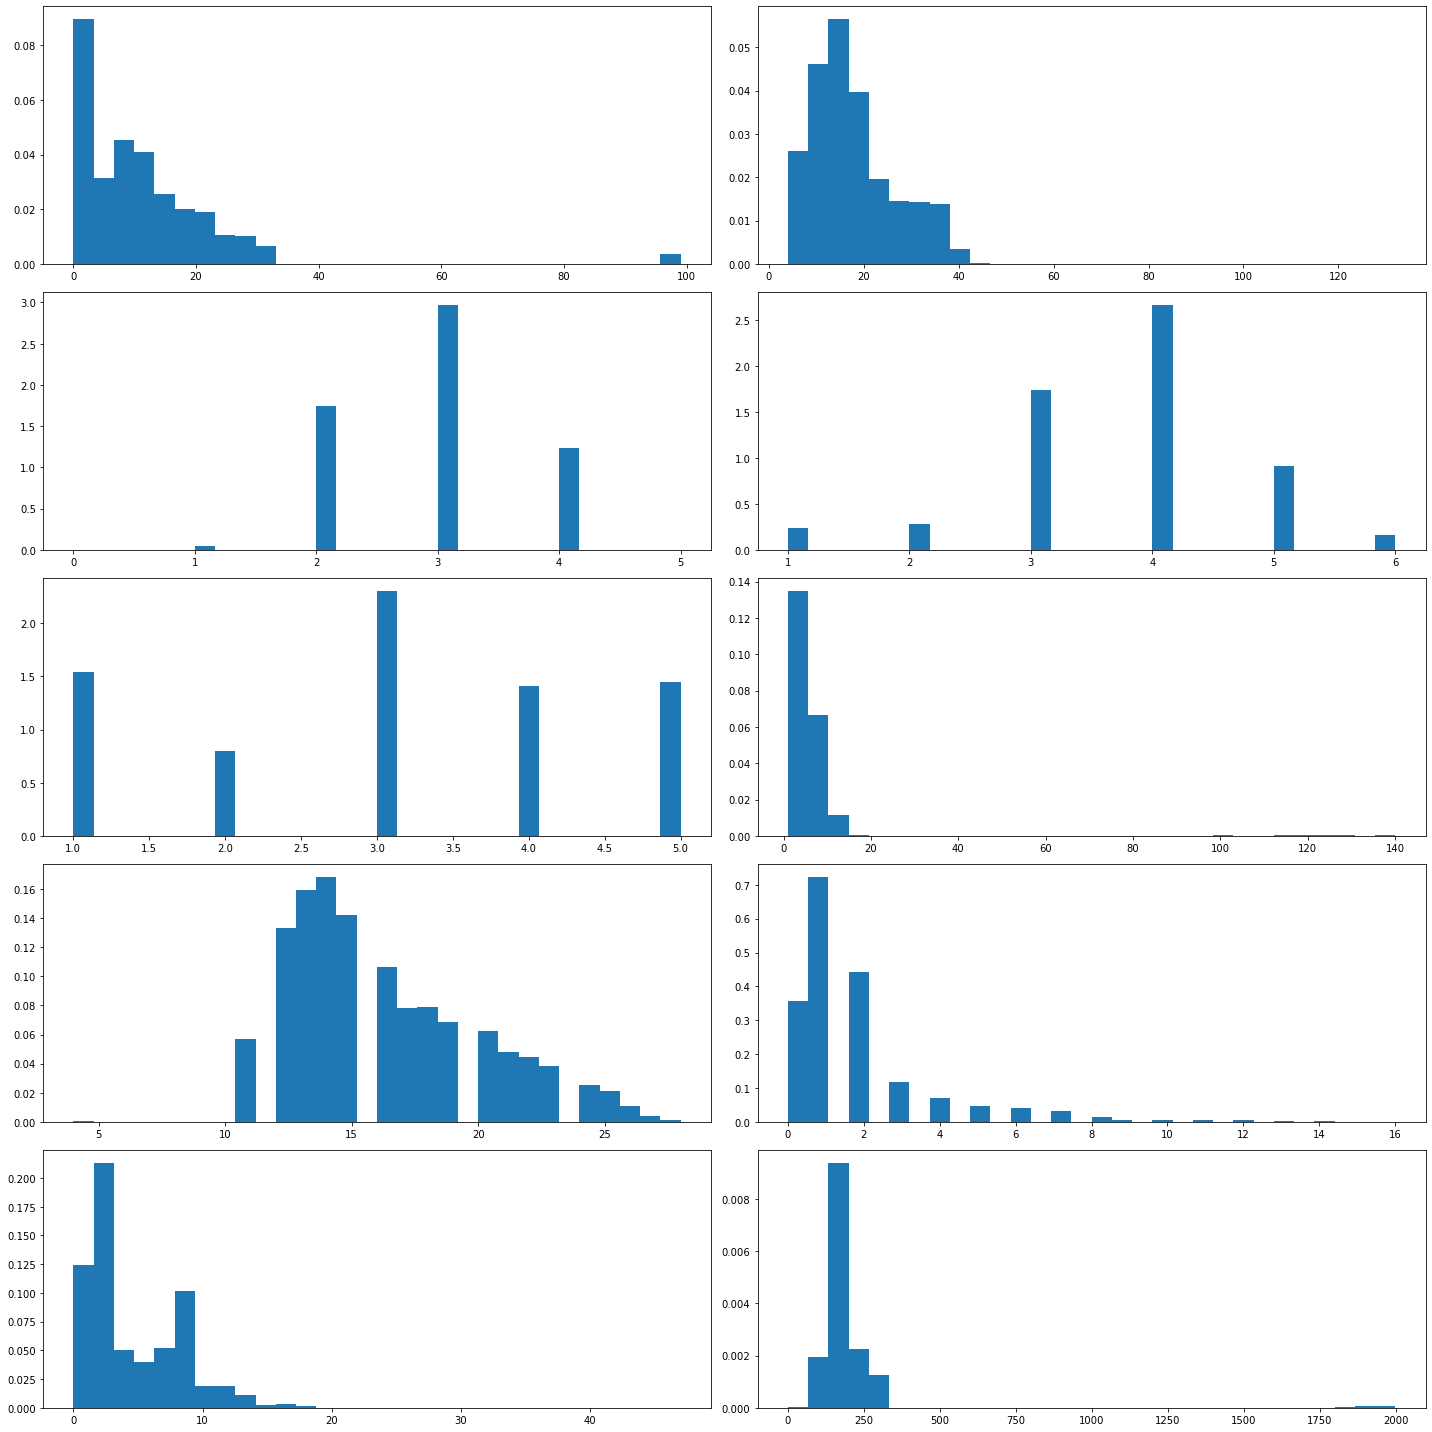

In [186]:
cont= churn[['Tenure', 'CC_Contacted_LY', 'Service_Score','Account_user_count','CC_Agent_Score','rev_per_month','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(cont.columns)):
    ax=fig.add_subplot(5,2,i+1)
    plt.hist(cont[cont.columns[i]],density=True, bins=30)
    plt.tight_layout()

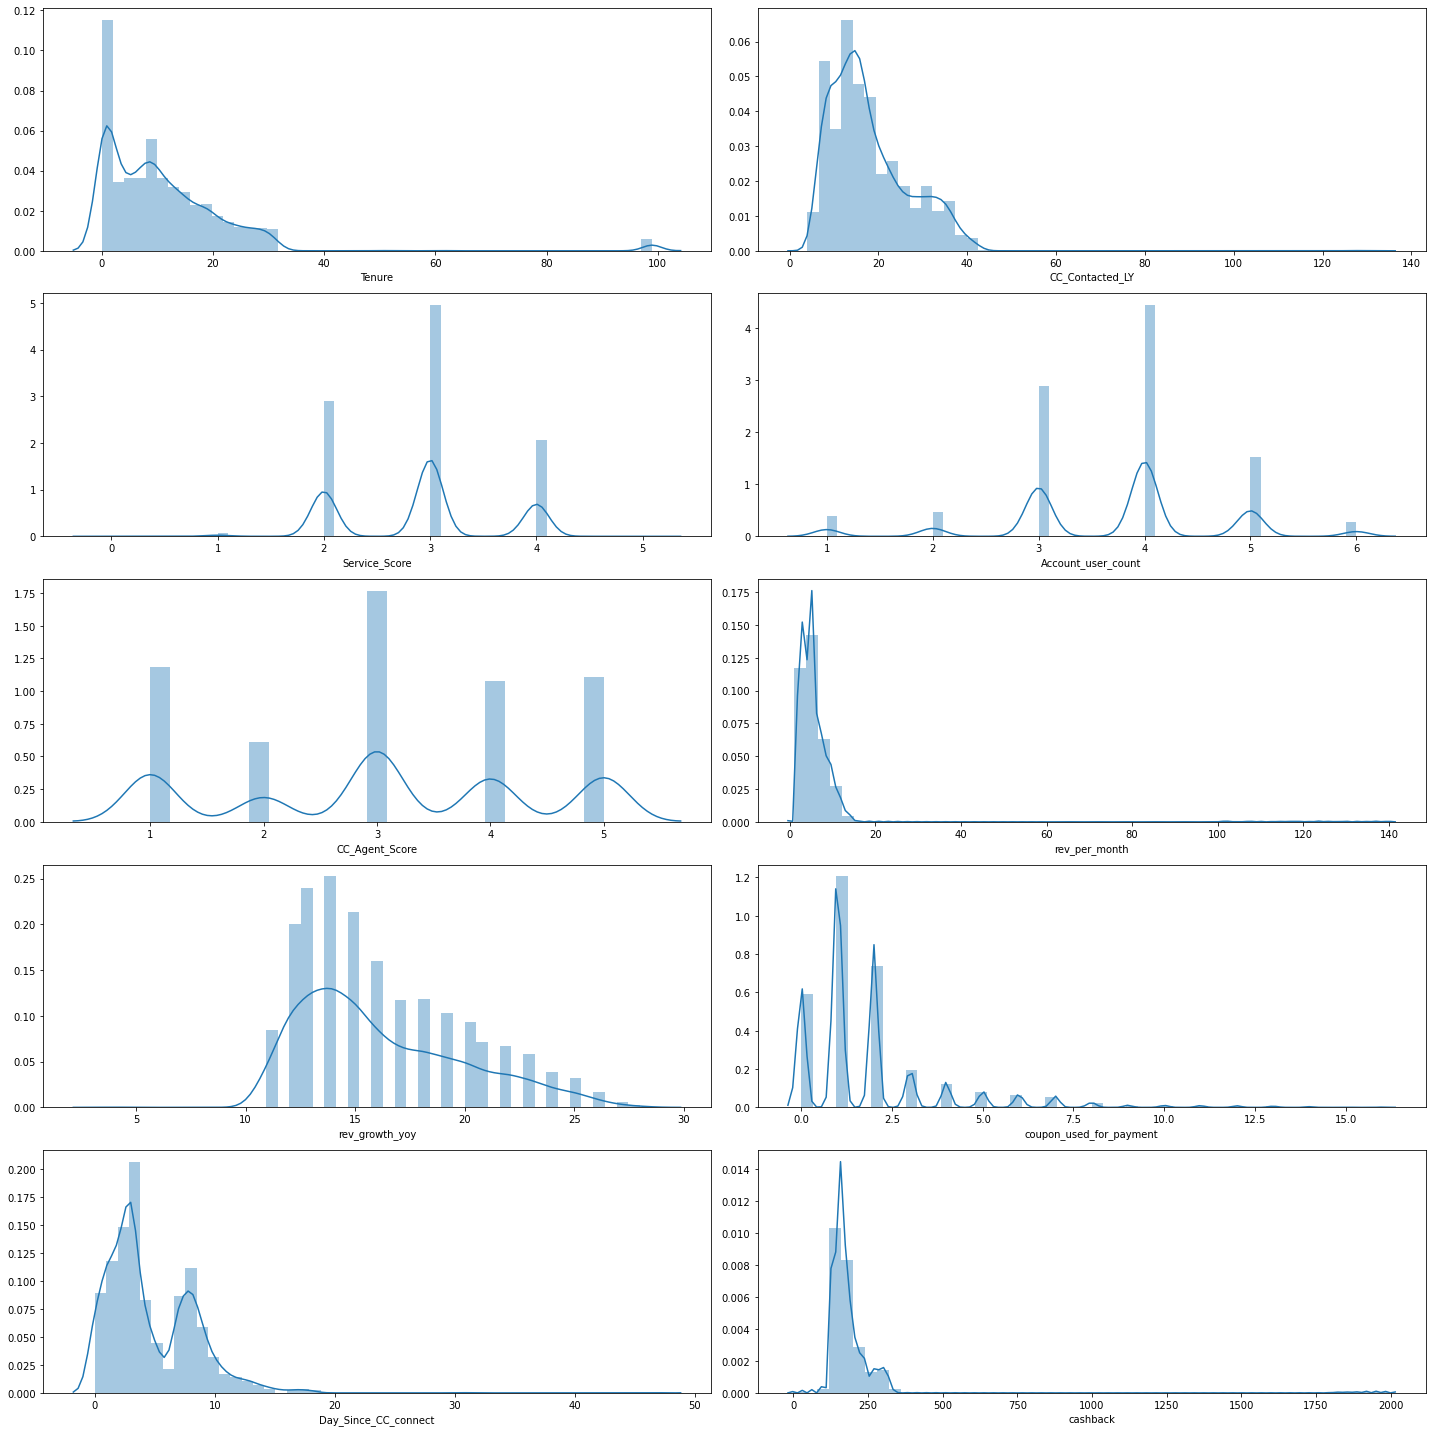

In [187]:
cont= churn[['Tenure', 'CC_Contacted_LY', 'Service_Score','Account_user_count','CC_Agent_Score','rev_per_month','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(cont.columns)):
    ax=fig.add_subplot(5,2,i+1)
    sns.distplot(cont[cont.columns[i]])
    plt.tight_layout()

Shape before Outliers Treatment (10946, 18)


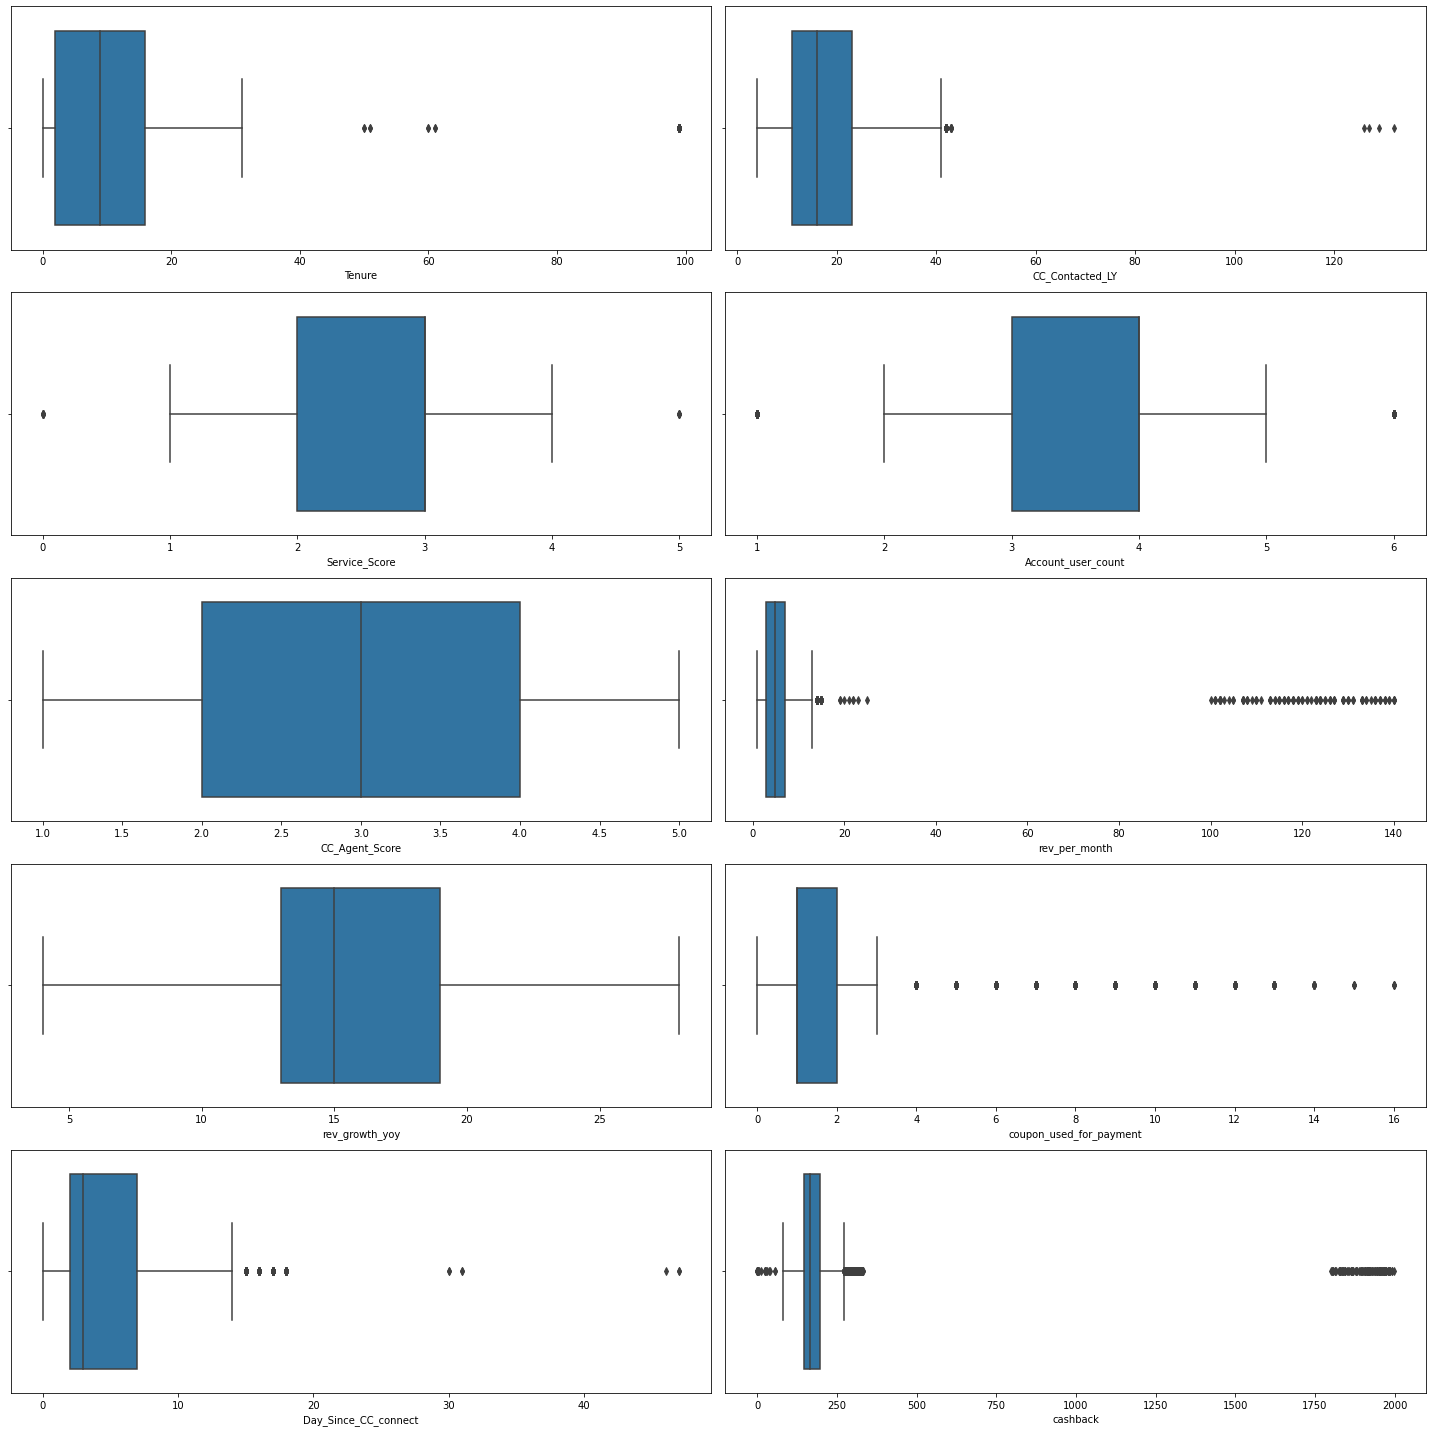

In [188]:
cont= churn[['Tenure', 'CC_Contacted_LY', 'Service_Score','Account_user_count','CC_Agent_Score','rev_per_month','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(cont.columns)):
    ax=fig.add_subplot(5,2,i+1)
    sns.boxplot(cont[cont.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',churn.shape)

# Univariate Analysis - Categorical values
Geting unique counts of all Nominal Variables¶

In [189]:
categorical_column = [col for col in churn.columns if churn.dtypes[col] == 'object']
for column in churn[categorical_column]:
    print(column.upper(),': ',churn[column].nunique())
    print(churn[column].value_counts().sort_values())
    print('\n')

CHURN :  2
1    1842
0    9104
Name: Churn, dtype: int64


CITY_TIER :  3
2.0     455
3.0    3322
1.0    7169
Name: City_Tier, dtype: int64


PAYMENT :  5
UPI                  793
Cash on Delivery     973
E wallet            1190
Credit Card         3426
Debit Card          4564
Name: Payment, dtype: int64


GENDER :  2
F    4323
M    6623
Name: Gender, dtype: int64


ACCOUNT_SEGMENT :  5
Regular          510
Super Plus       800
HNI             1608
Super           3940
Regular Plus    4088
Name: account_segment, dtype: int64


MARITAL_STATUS :  3
Divorced    1668
Single      3391
Married     5887
Name: Marital_Status, dtype: int64


COMPLAIN_LY :  2
1.0    3023
0.0    7923
Name: Complain_ly, dtype: int64


LOGIN_DEVICE :  2
Computer    2923
Mobile      8023
Name: Login_device, dtype: int64




# Visualizing Categorical Variables - Univariate Analysis

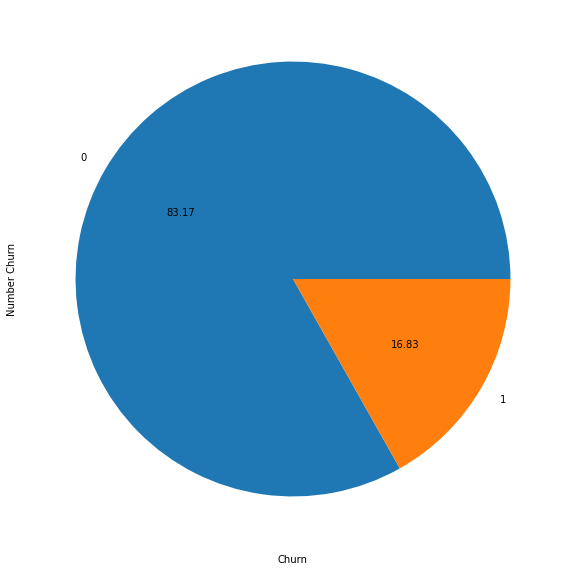

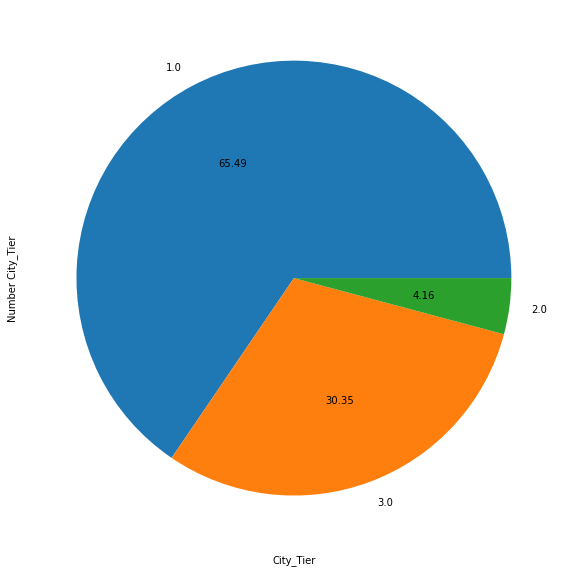

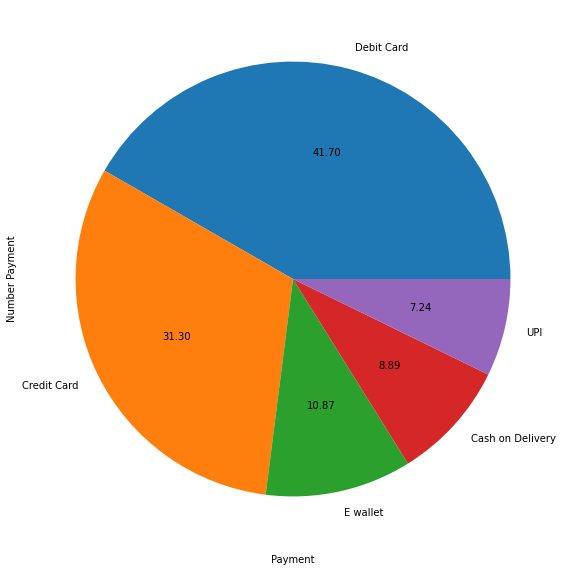

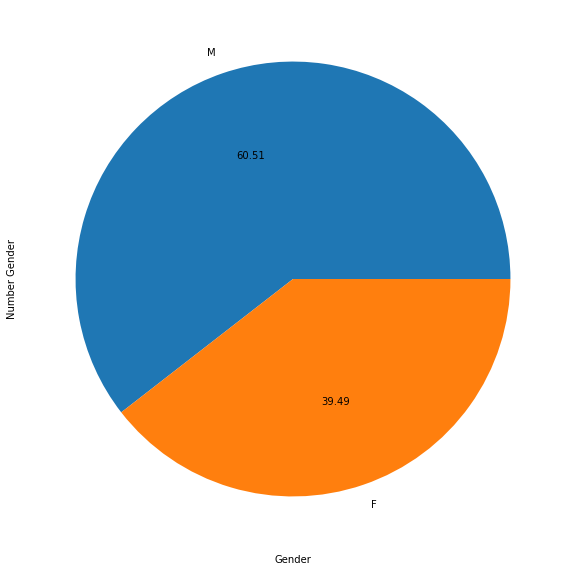

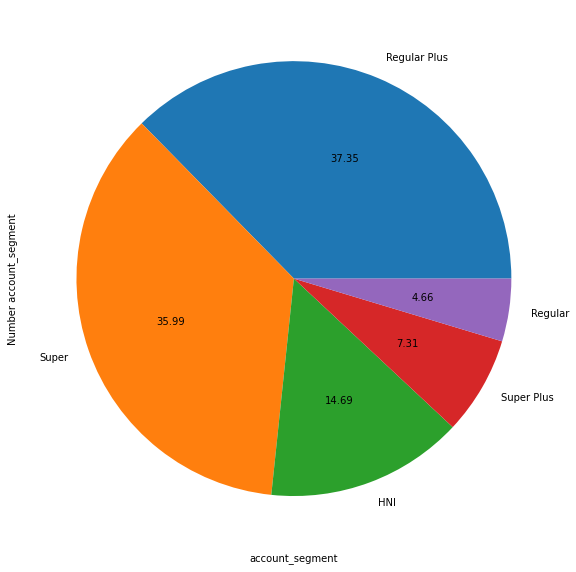

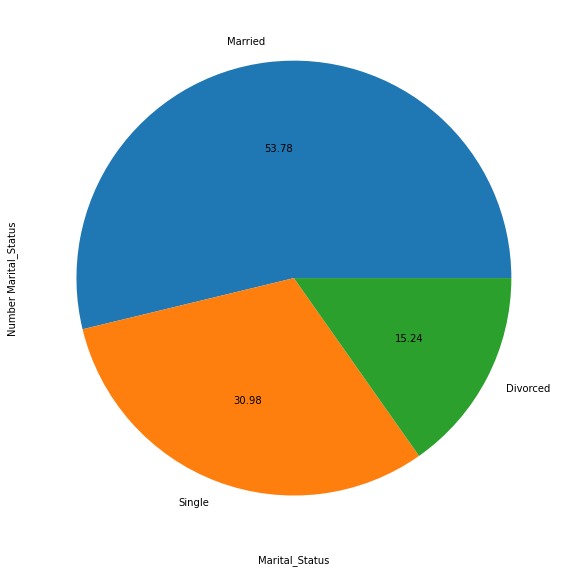

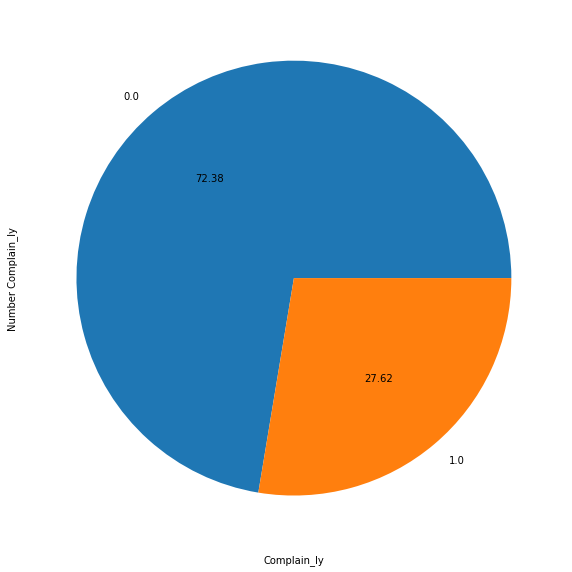

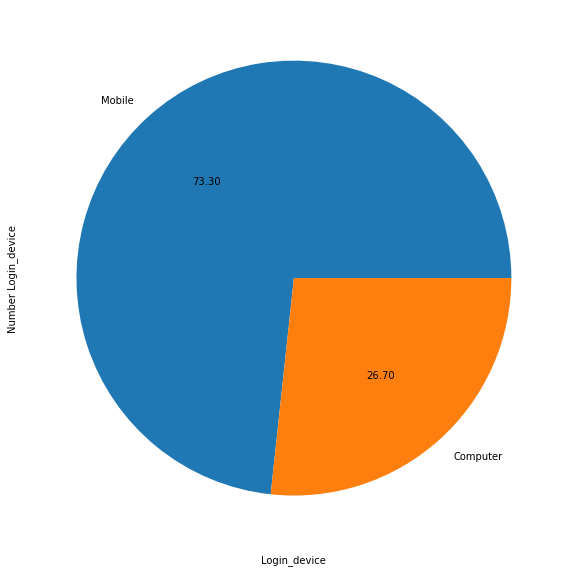

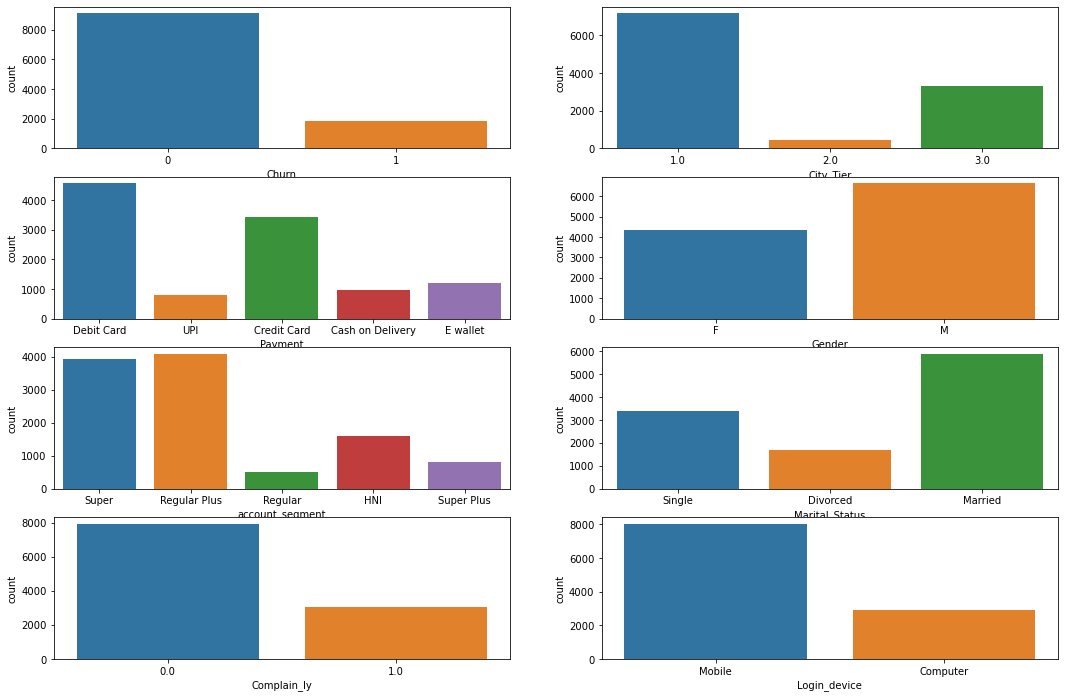

In [190]:
for col in categorical_column:
    plt.figure(figsize=(20, 15))
    churn[col].value_counts().plot.pie(figsize=(10, 10), autopct='%.2f')
    plt.ylabel('Number '+ col)
    plt.xlabel(col);

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 12))
for col, ax in zip(categorical_column, axs.ravel()):
    sns.countplot(x=col, data=churn, ax=ax)

# Bivariate analysis

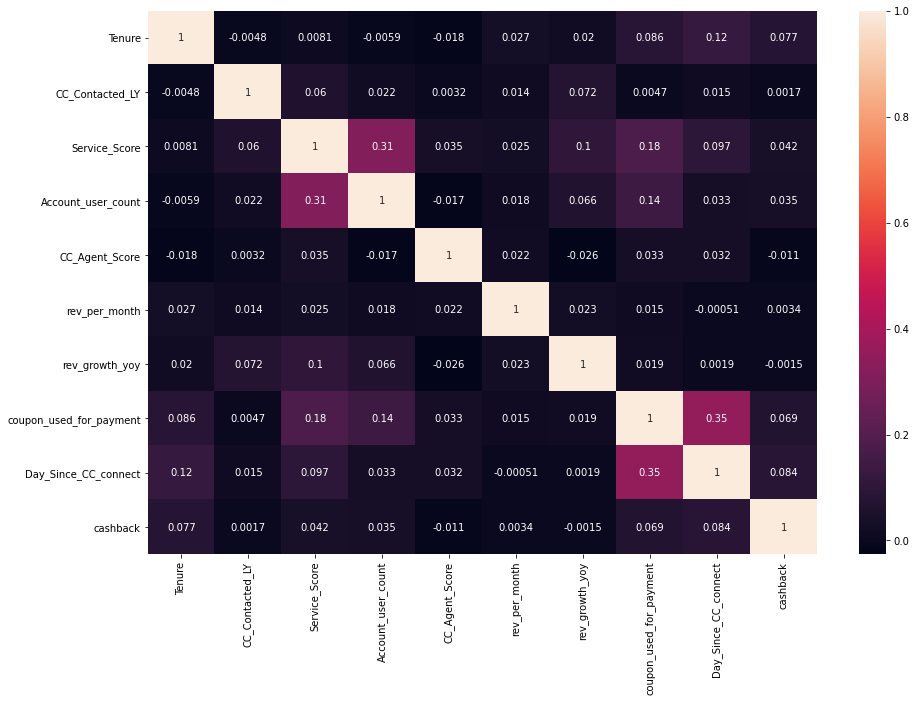

In [191]:
# Correlation matrix  
corr = churn.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.show()

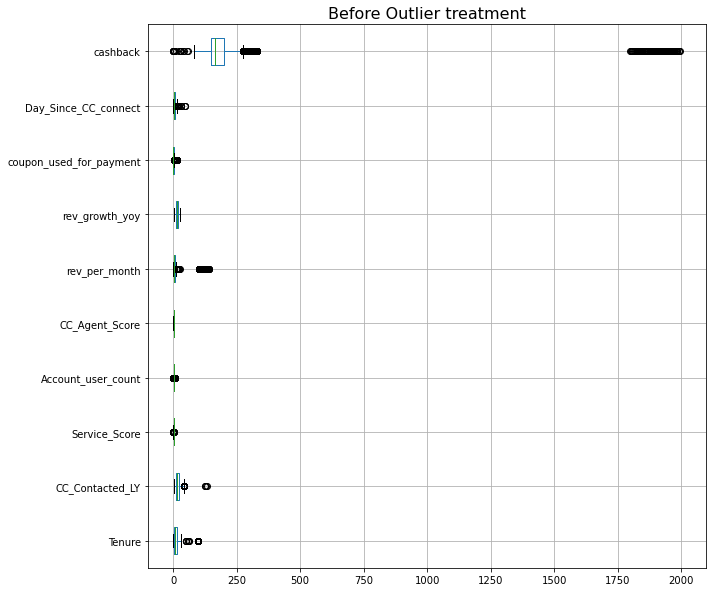

In [192]:
plt.figure(figsize=(10,10))
churn.boxplot(vert=0)
plt.title('Before Outlier treatment',fontsize=16)
plt.show()

In [193]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [194]:
for column in churn.columns:
    if churn[column].dtype != 'object': 
        lr,ur=remove_outlier(churn[column])
        churn[column]=np.where(churn[column]>ur,ur,churn[column])
        churn[column]=np.where(churn[column]<lr,lr,churn[column])

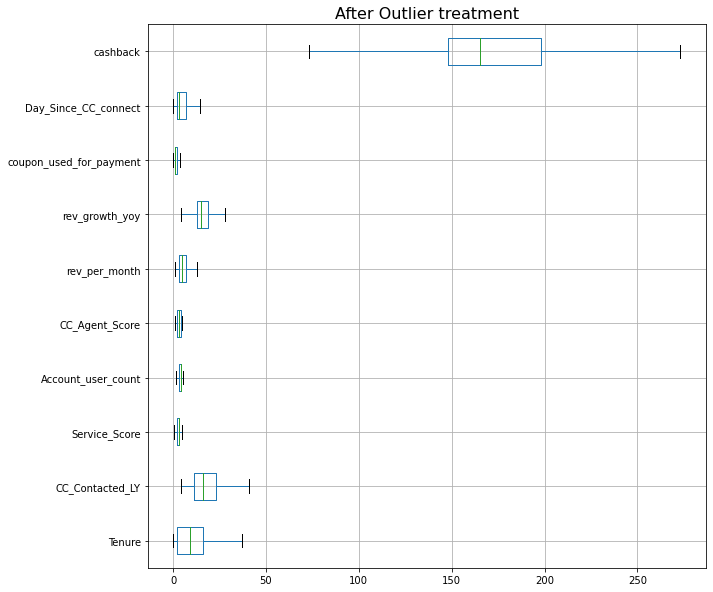

In [195]:
plt.figure(figsize=(10,10))
churn.boxplot(vert=0)
plt.title('After Outlier treatment',fontsize=16)
plt.show()

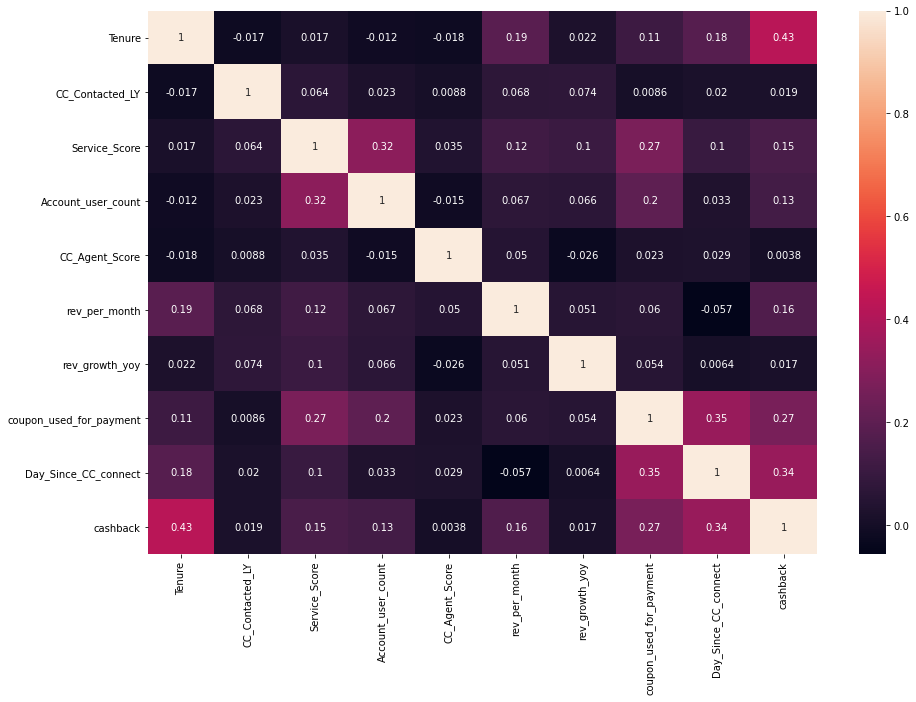

In [196]:
# Correlation matrix  
corr = churn.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);
plt.show()

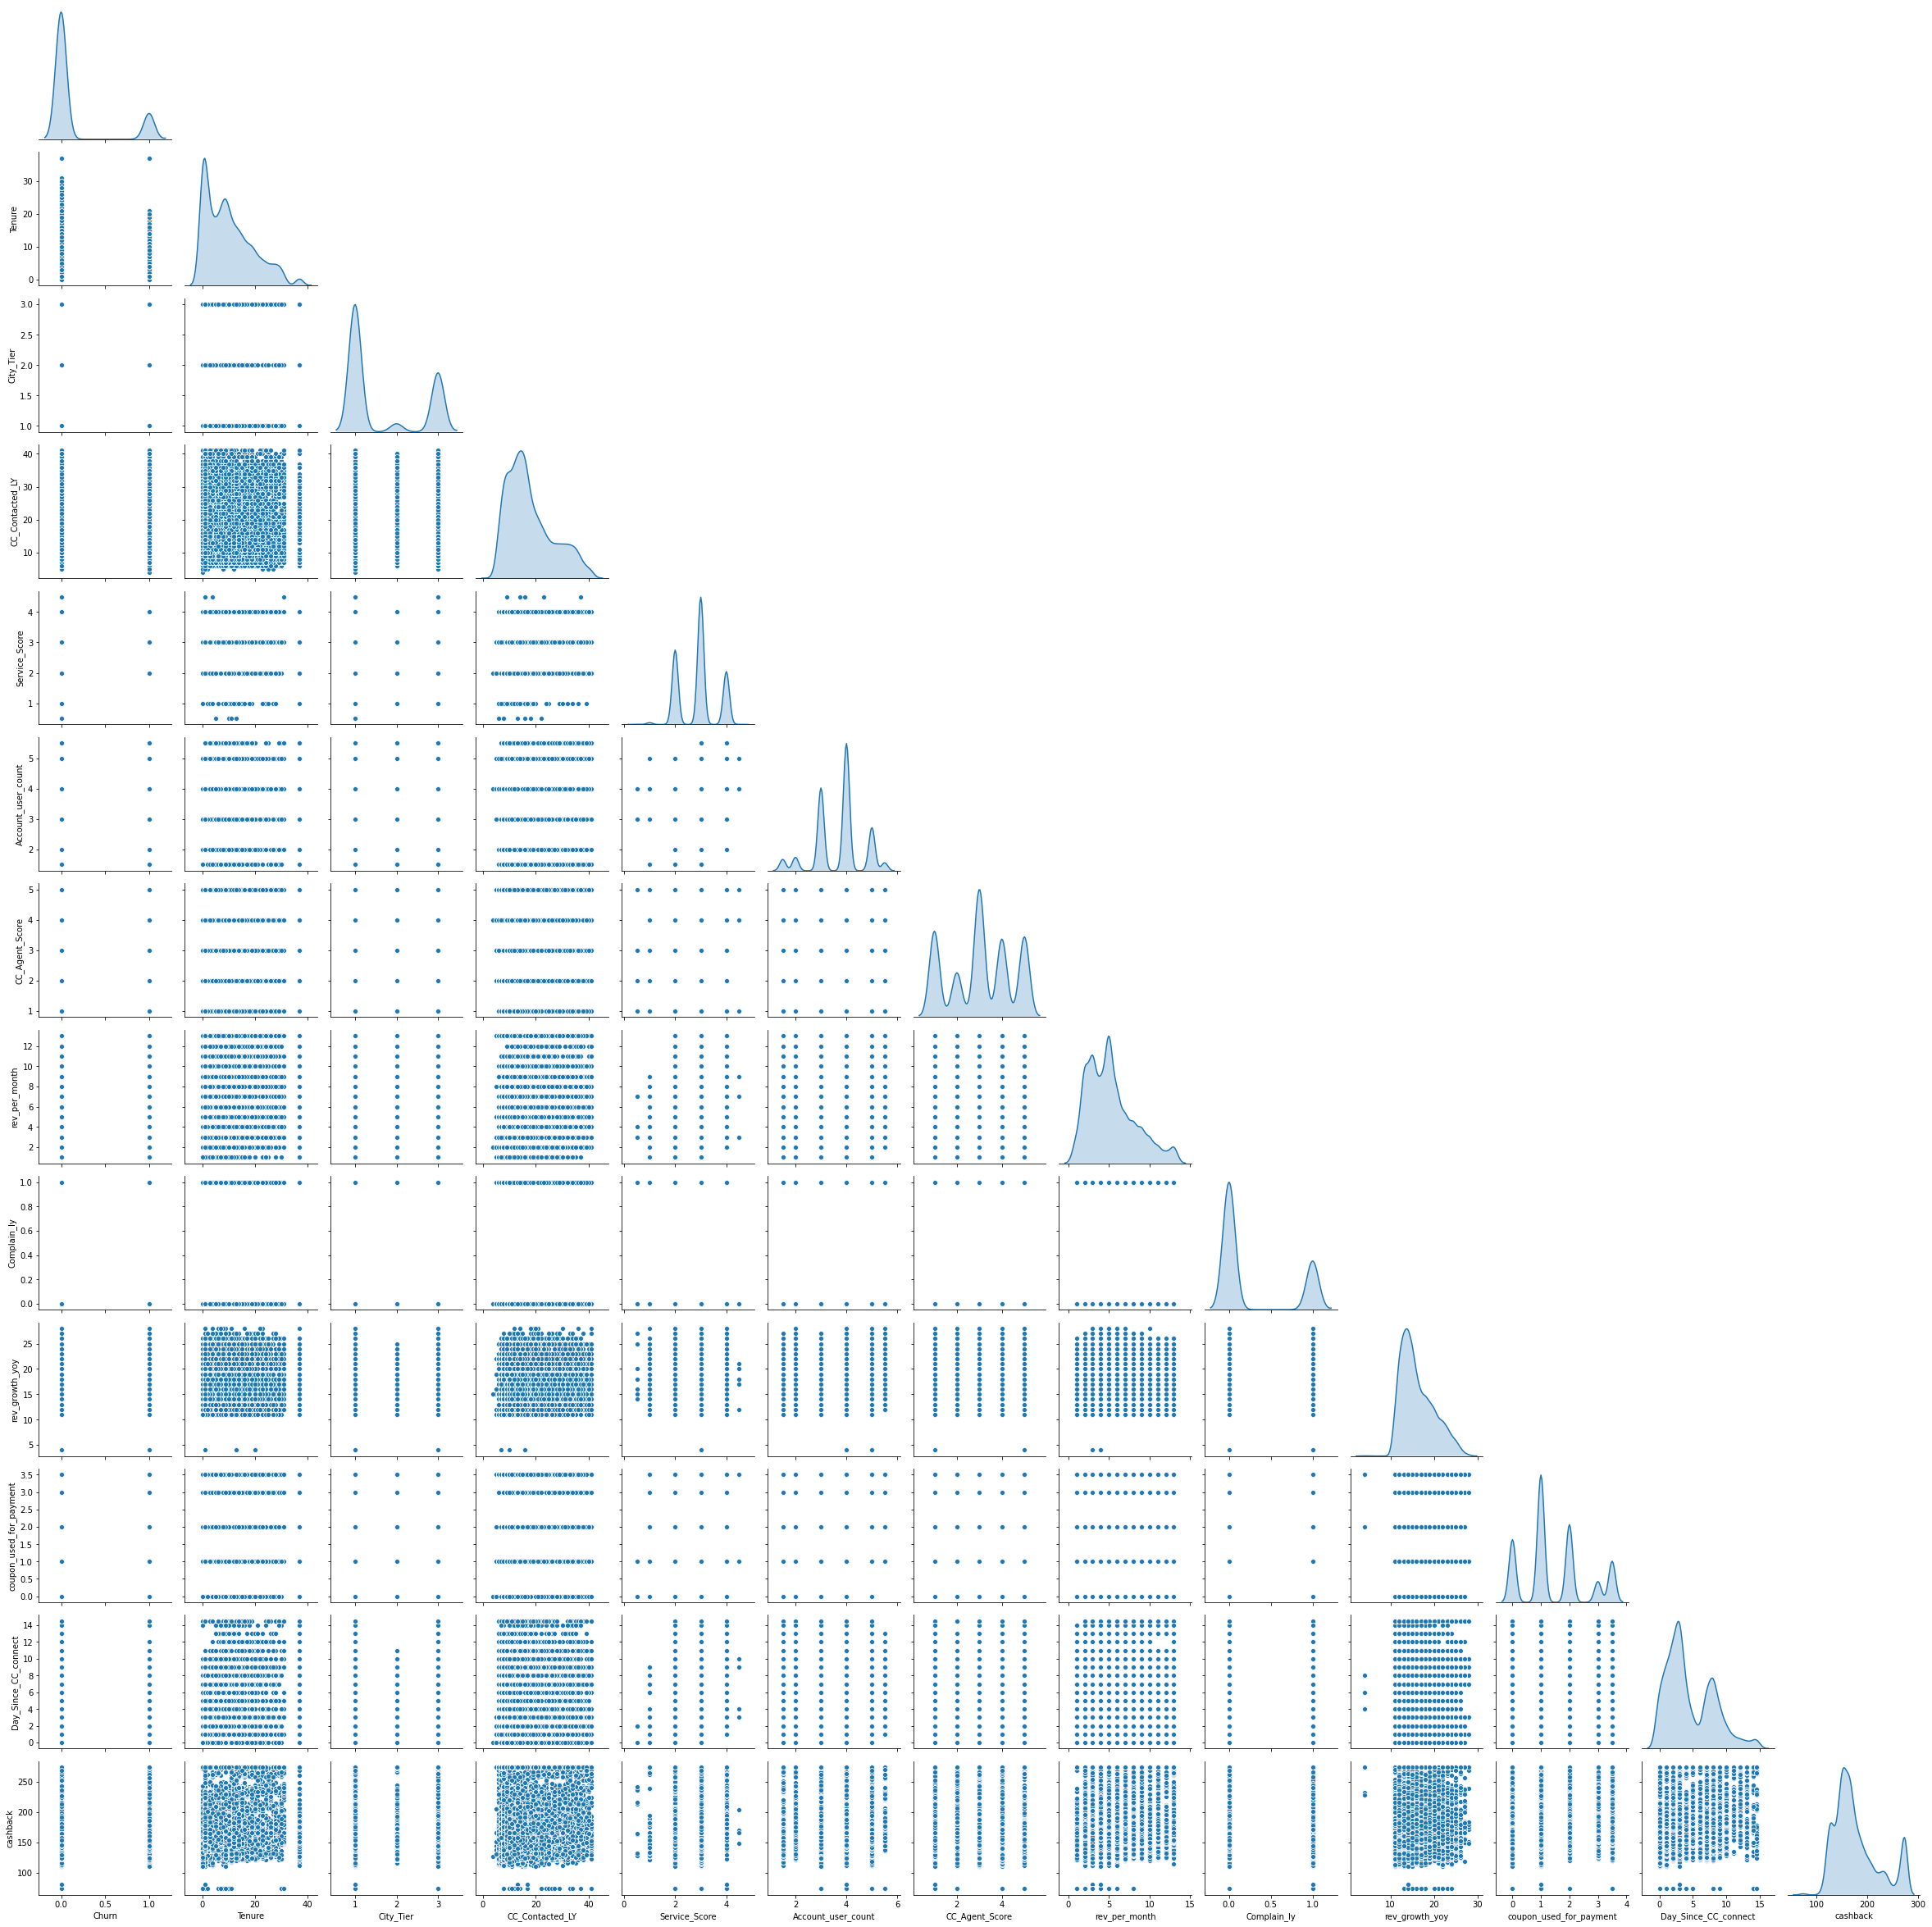

In [199]:
#Let us check for pair plots
sns.pairplot(churn,diag_kind='kde',corner=True)

Bivariate Analysis on Categorical Data - Categorical vs Categorical

In [200]:
def plot_stack(column_1, column_2):
 plot_stck=pd.crosstab(index=column_1, columns=column_2)
 plot_stck.plot(kind='bar', figsize=(8,8), stacked=True)
 return

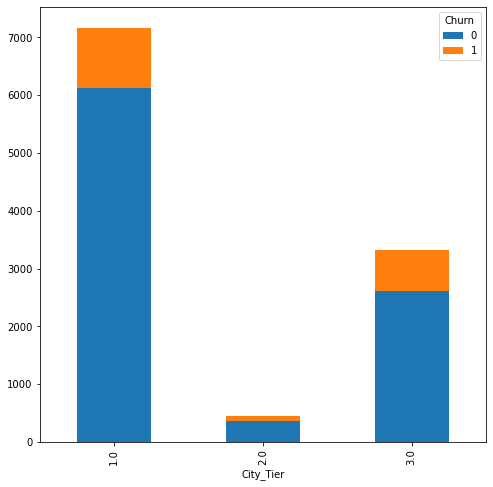

In [201]:
plot_stack(churn['City_Tier'], churn['Churn'])

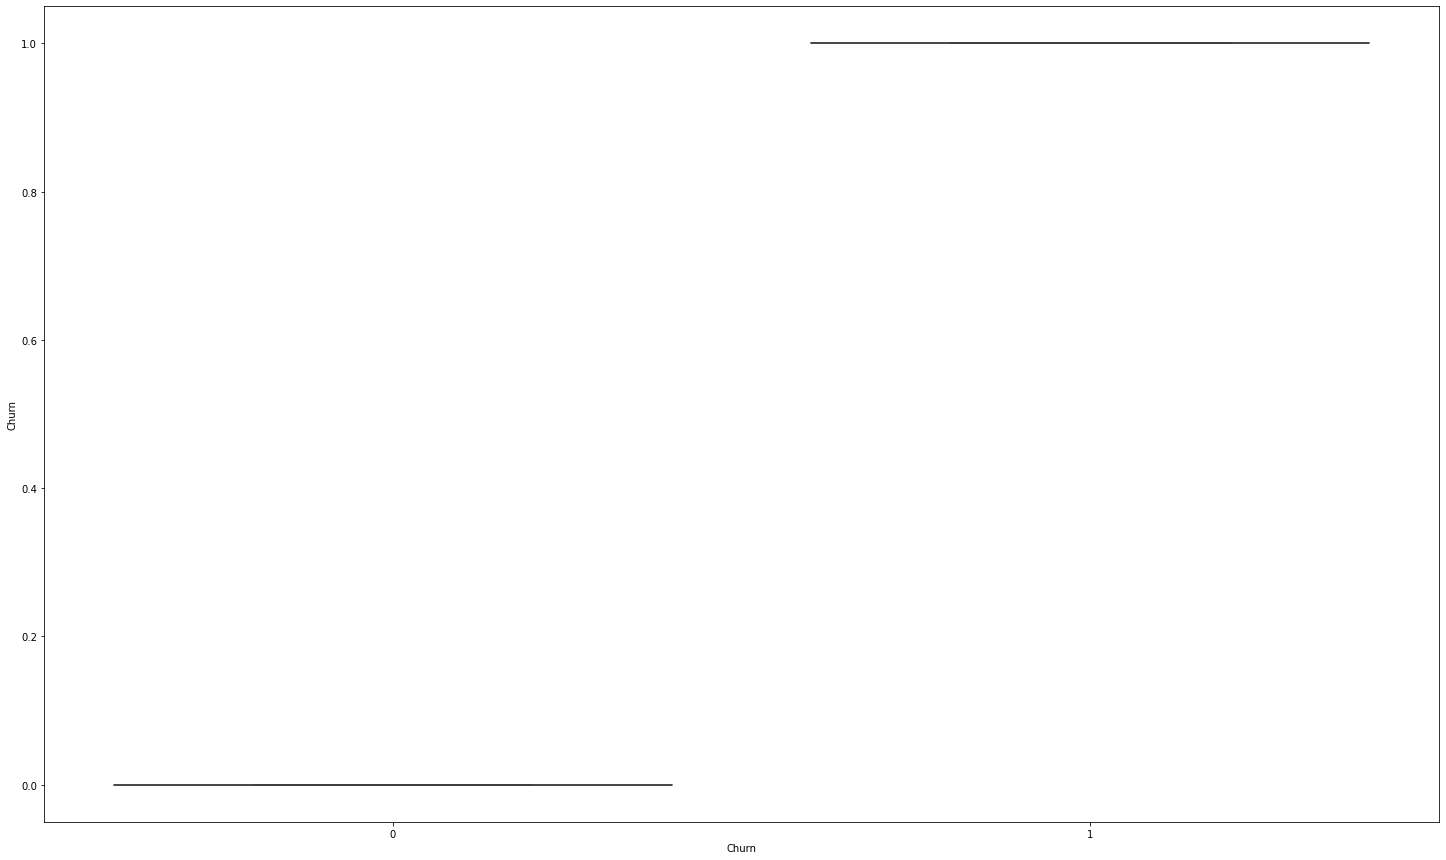

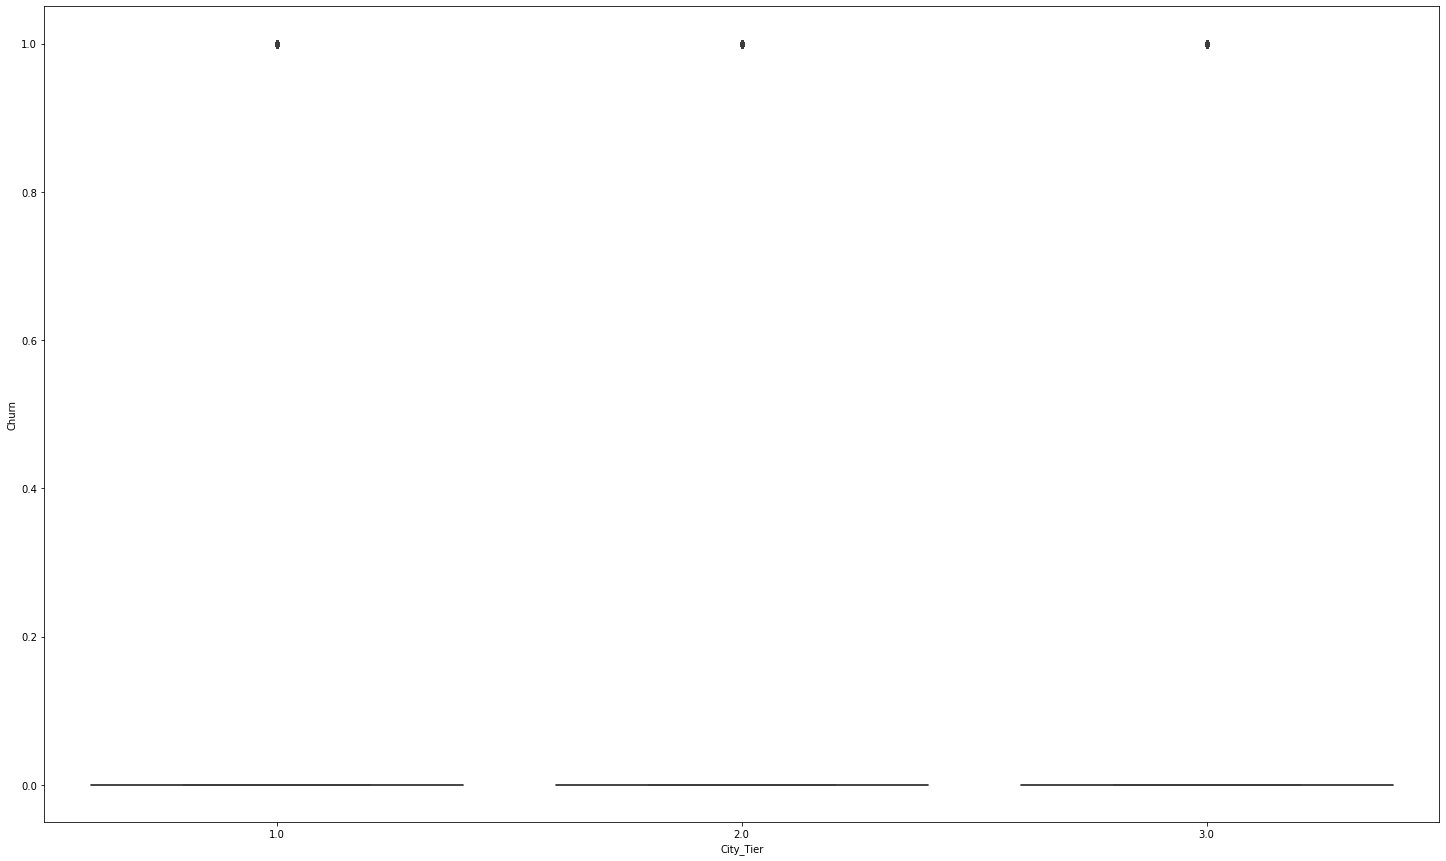

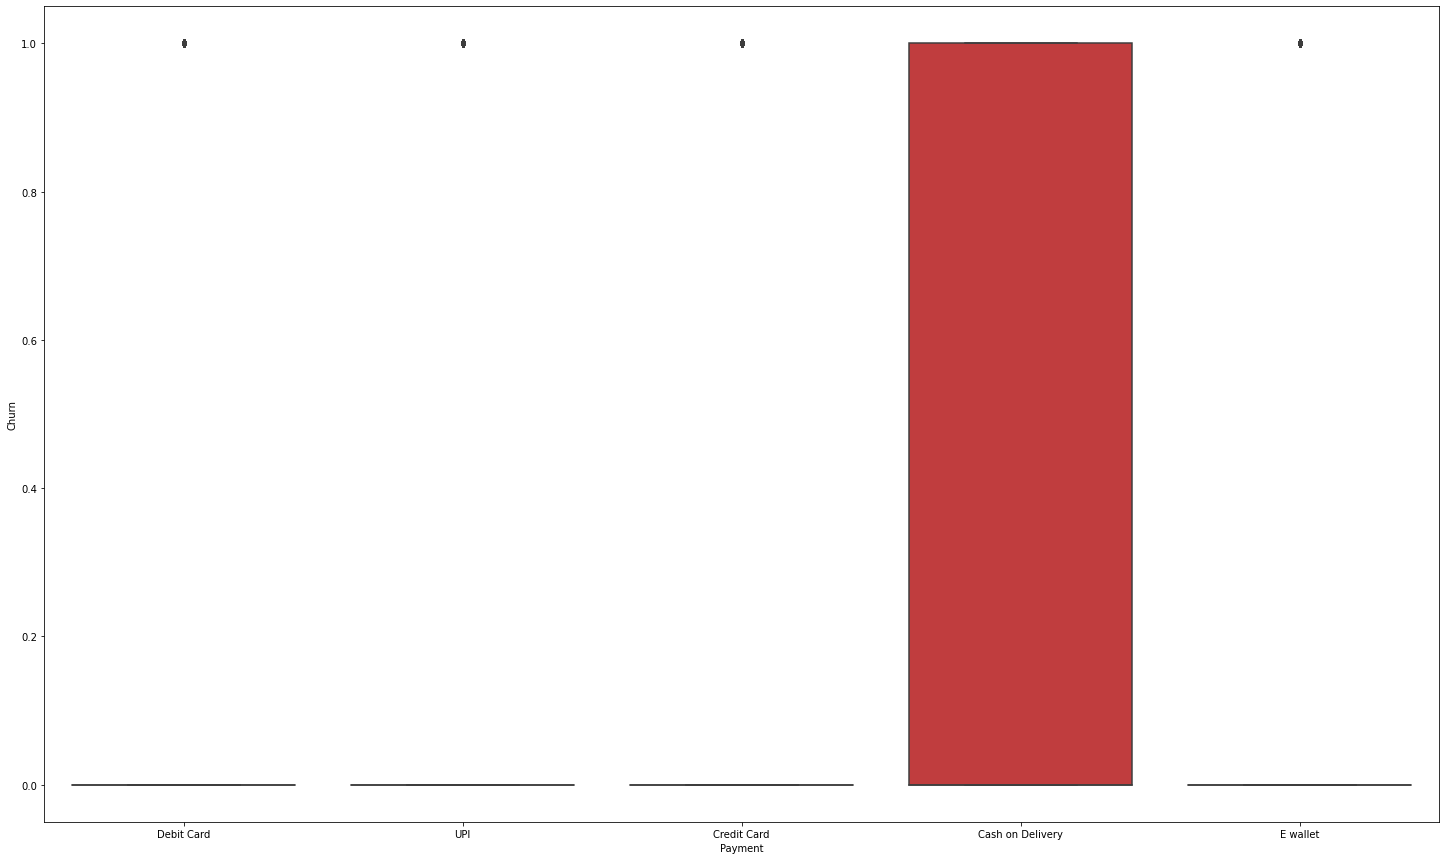

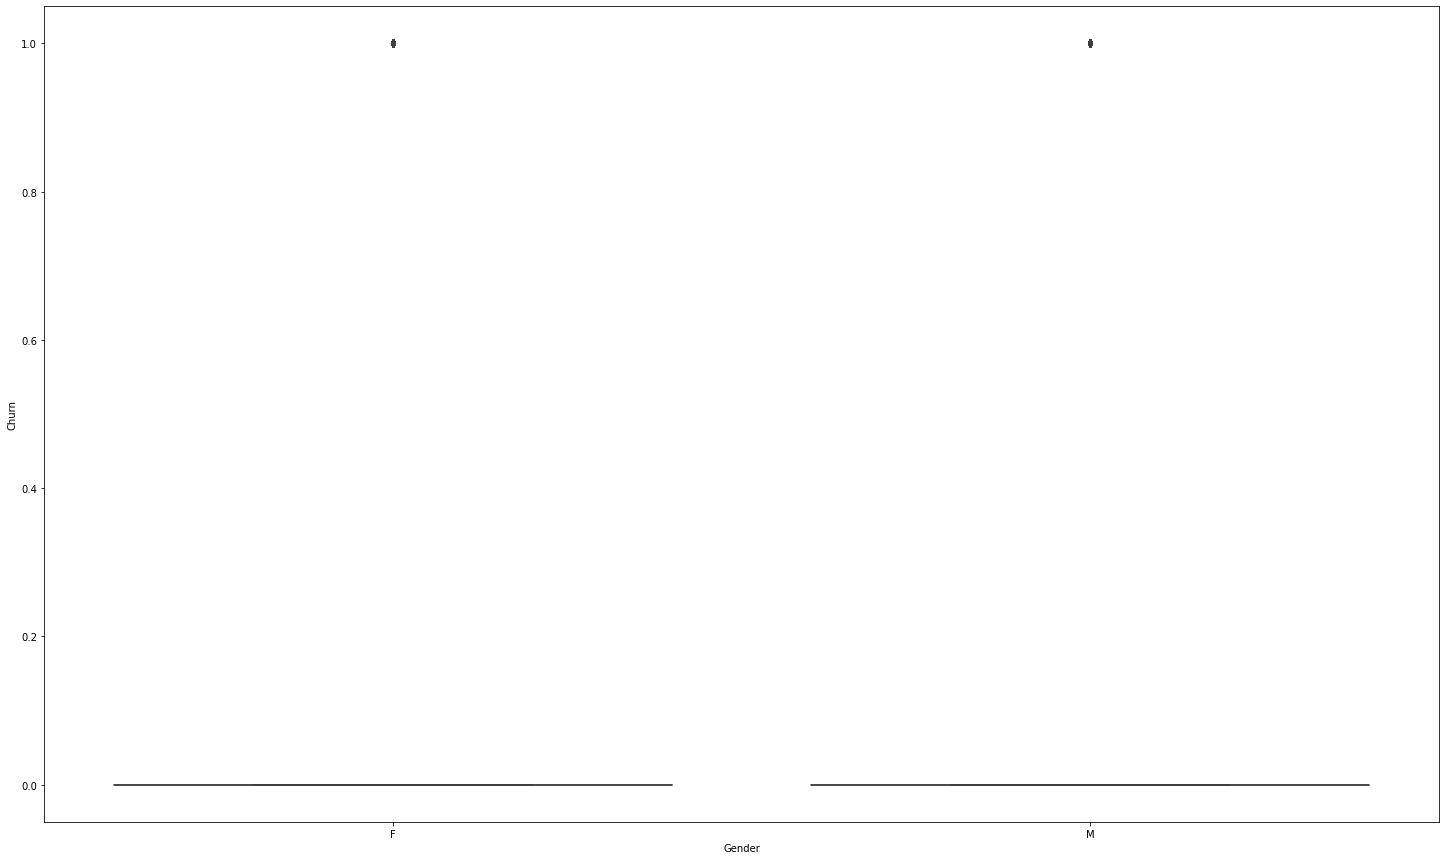

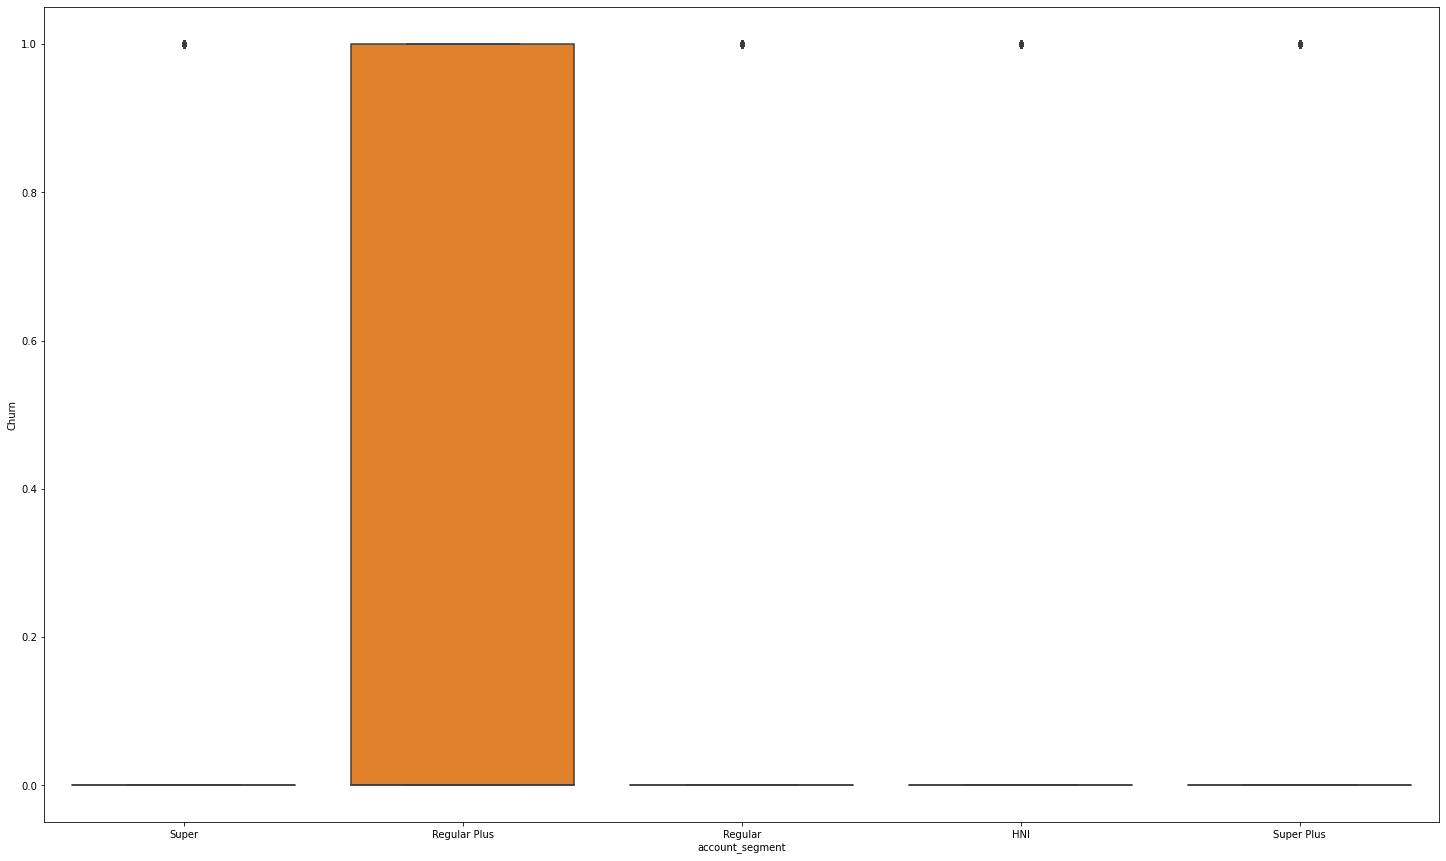

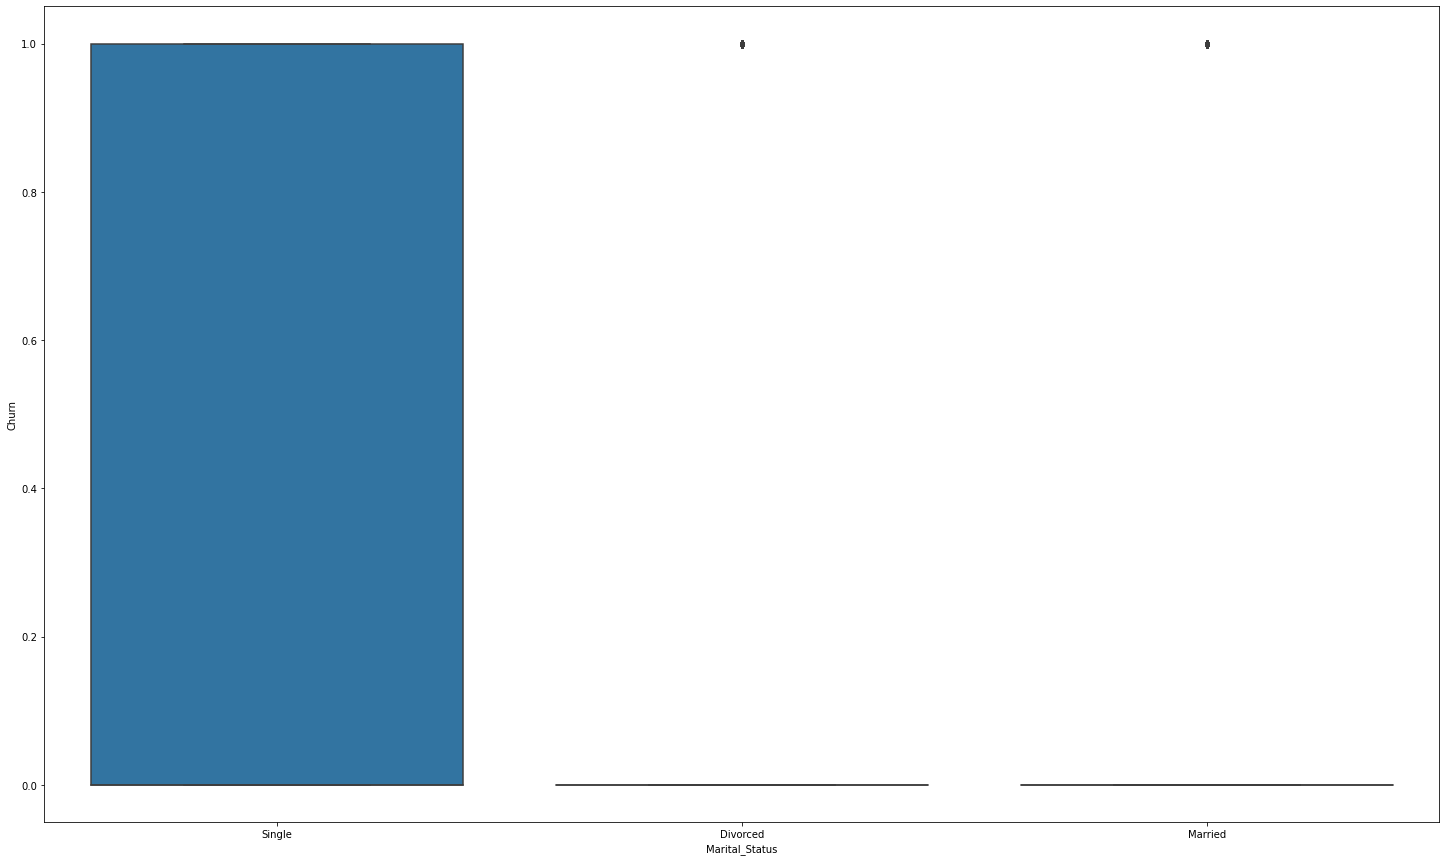

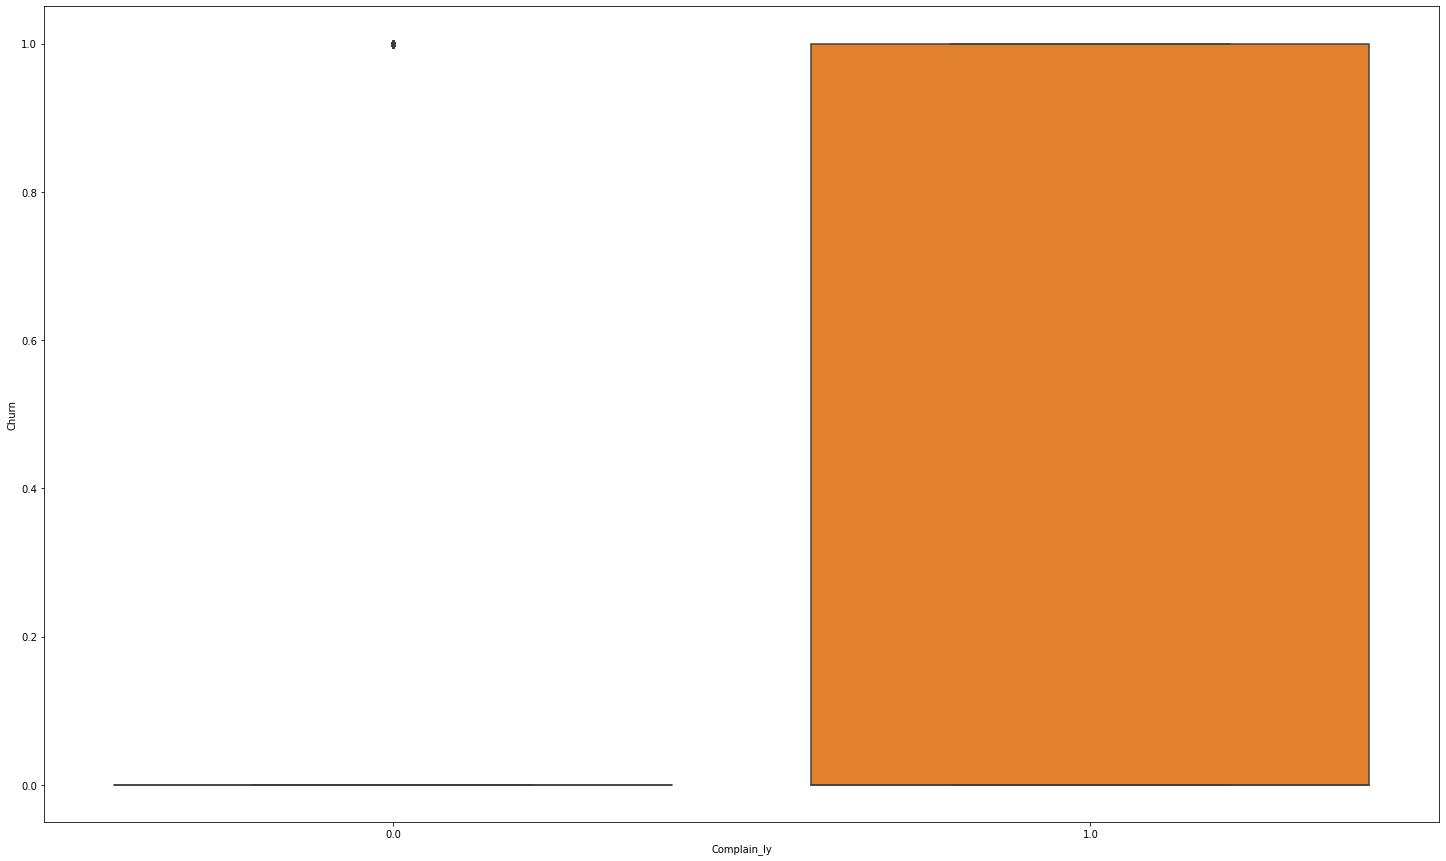

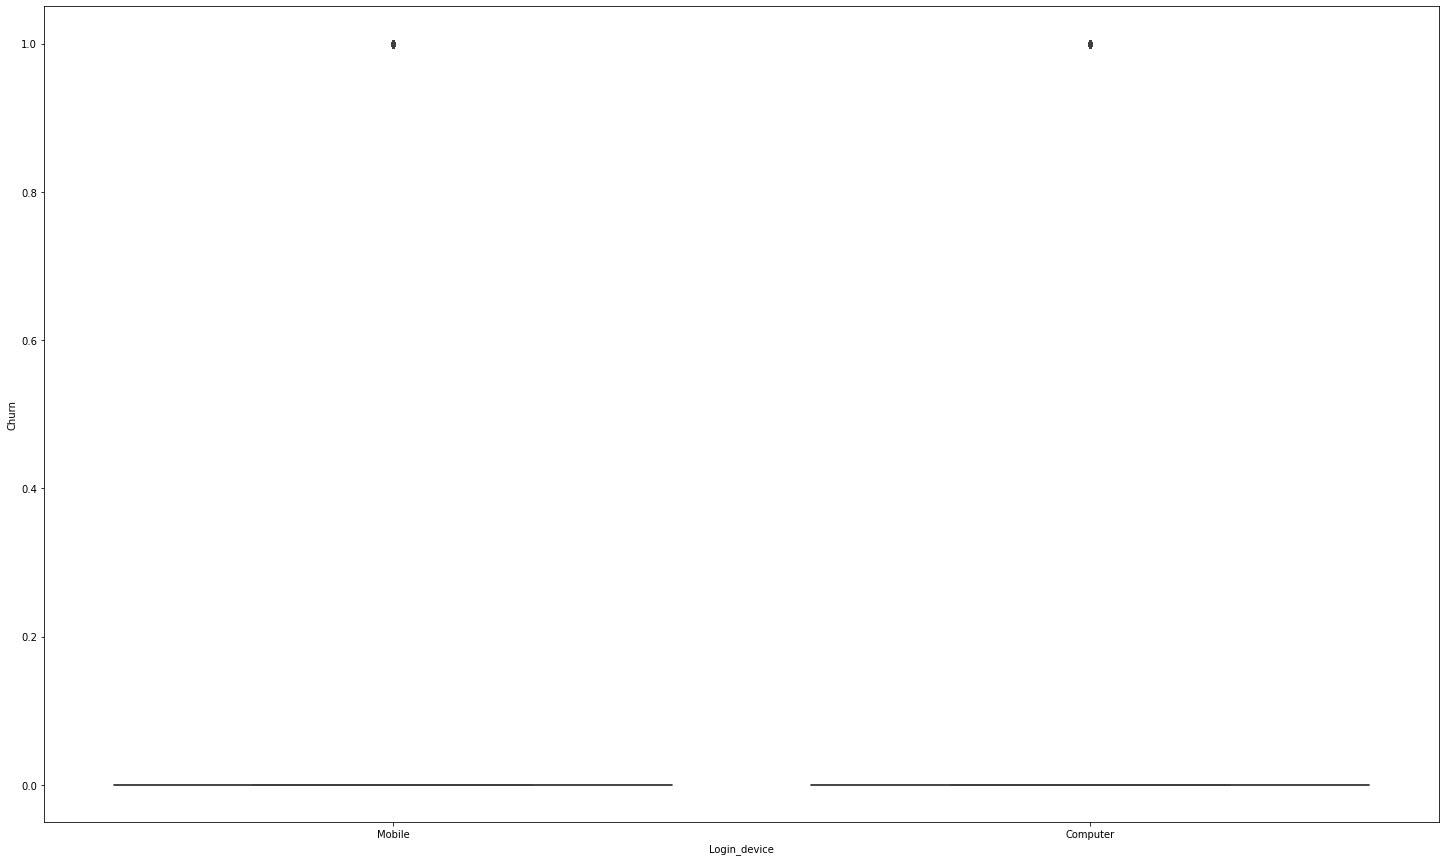

In [198]:
for col in categorical_column:
    plt.figure(figsize=(25, 15))
    sns.boxplot(x=col, y="Churn", data=churn)

sns.violinplot(x="Gender", y="Churn", data=churn)

Categorical & Numeric

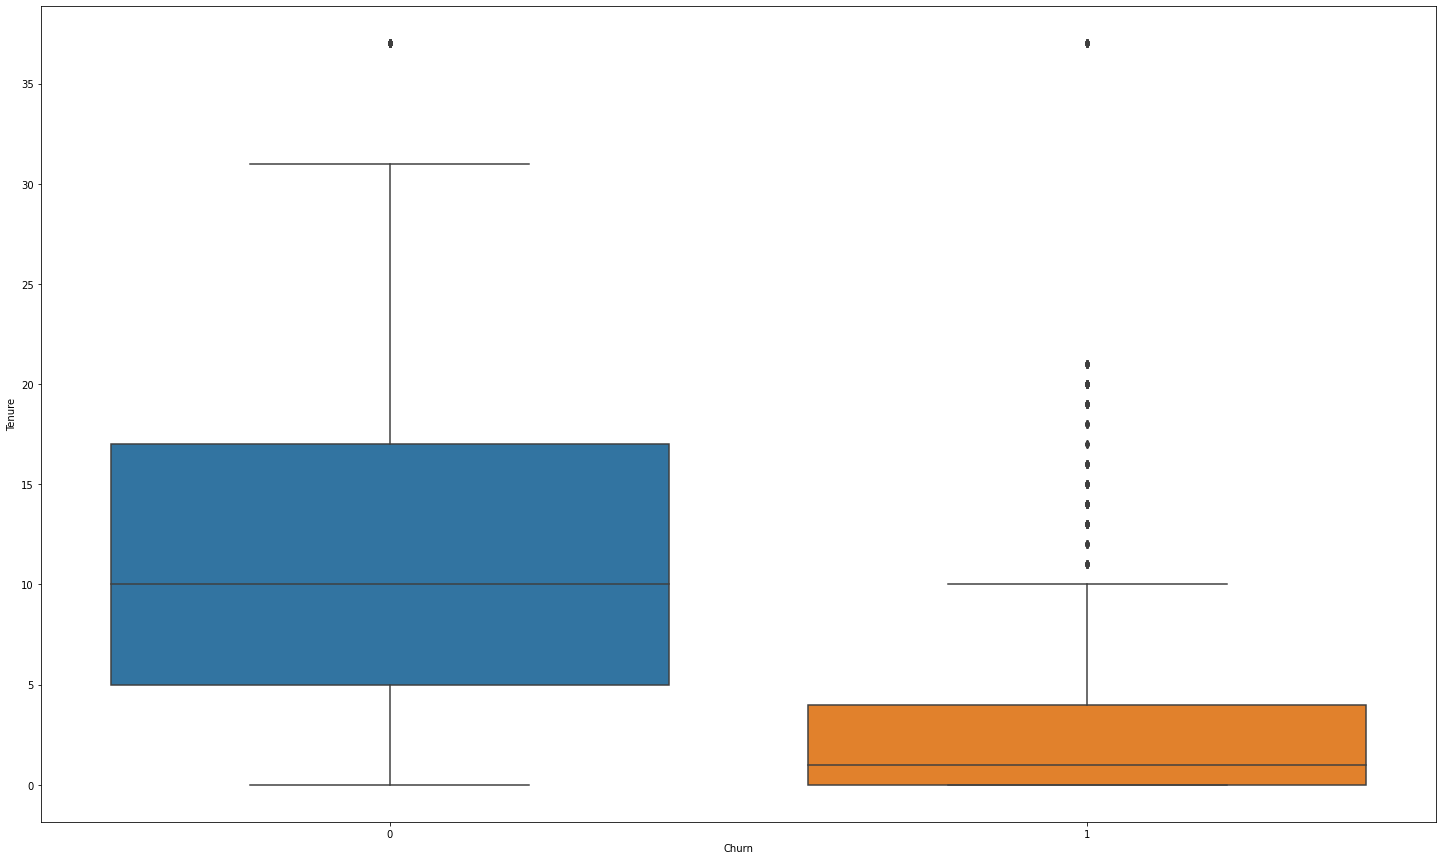

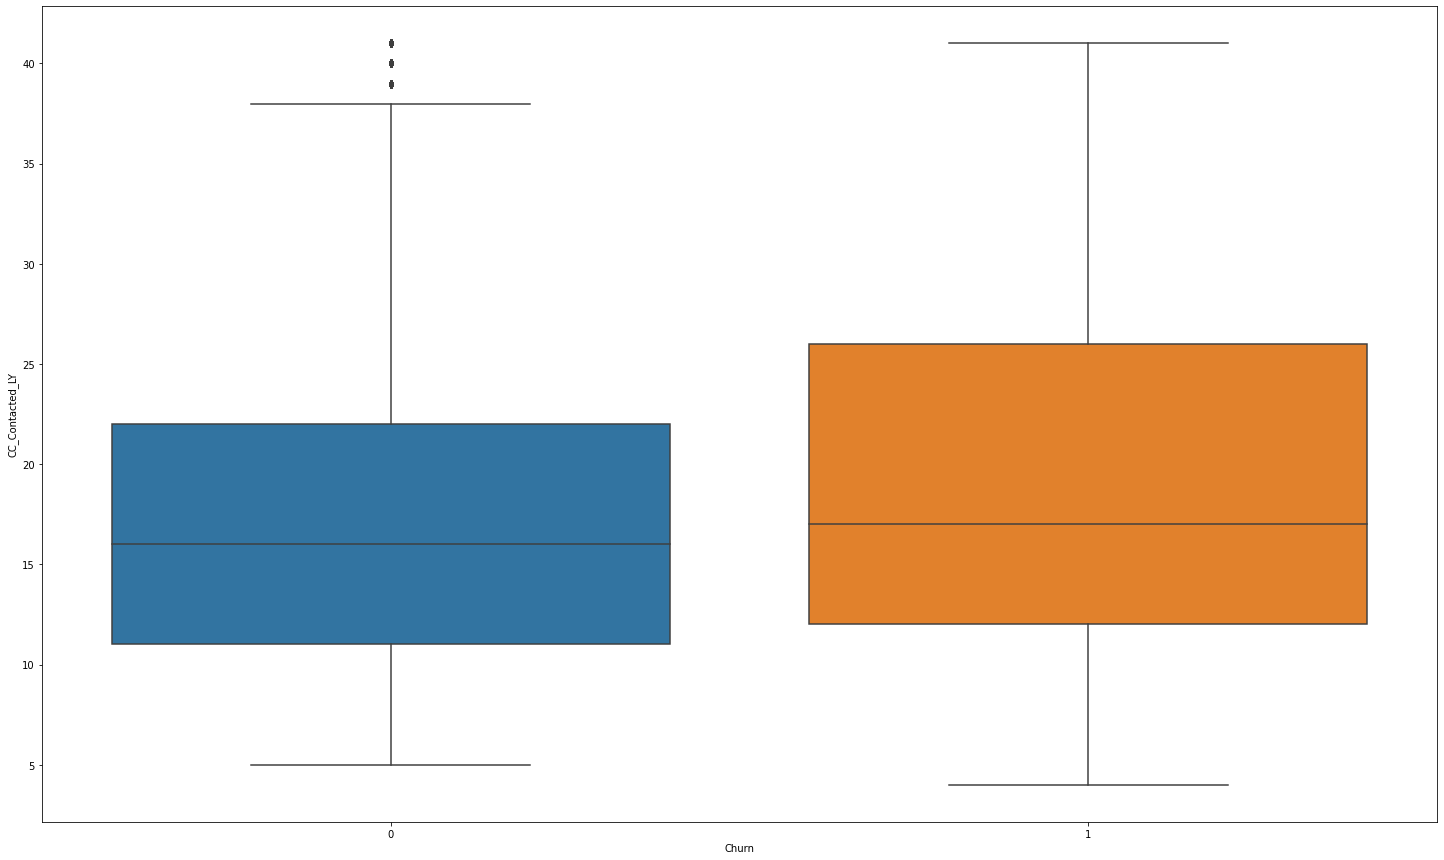

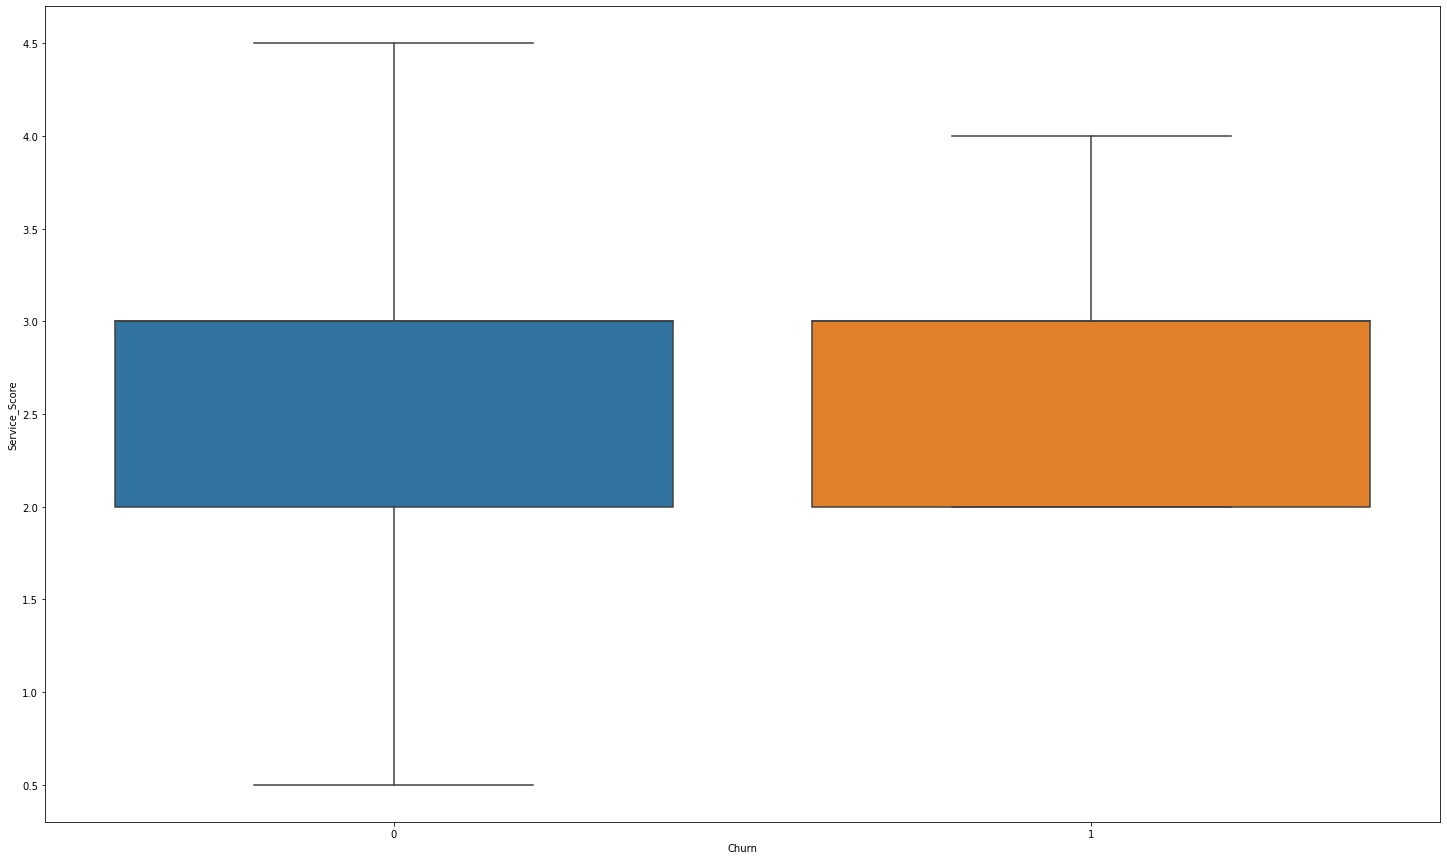

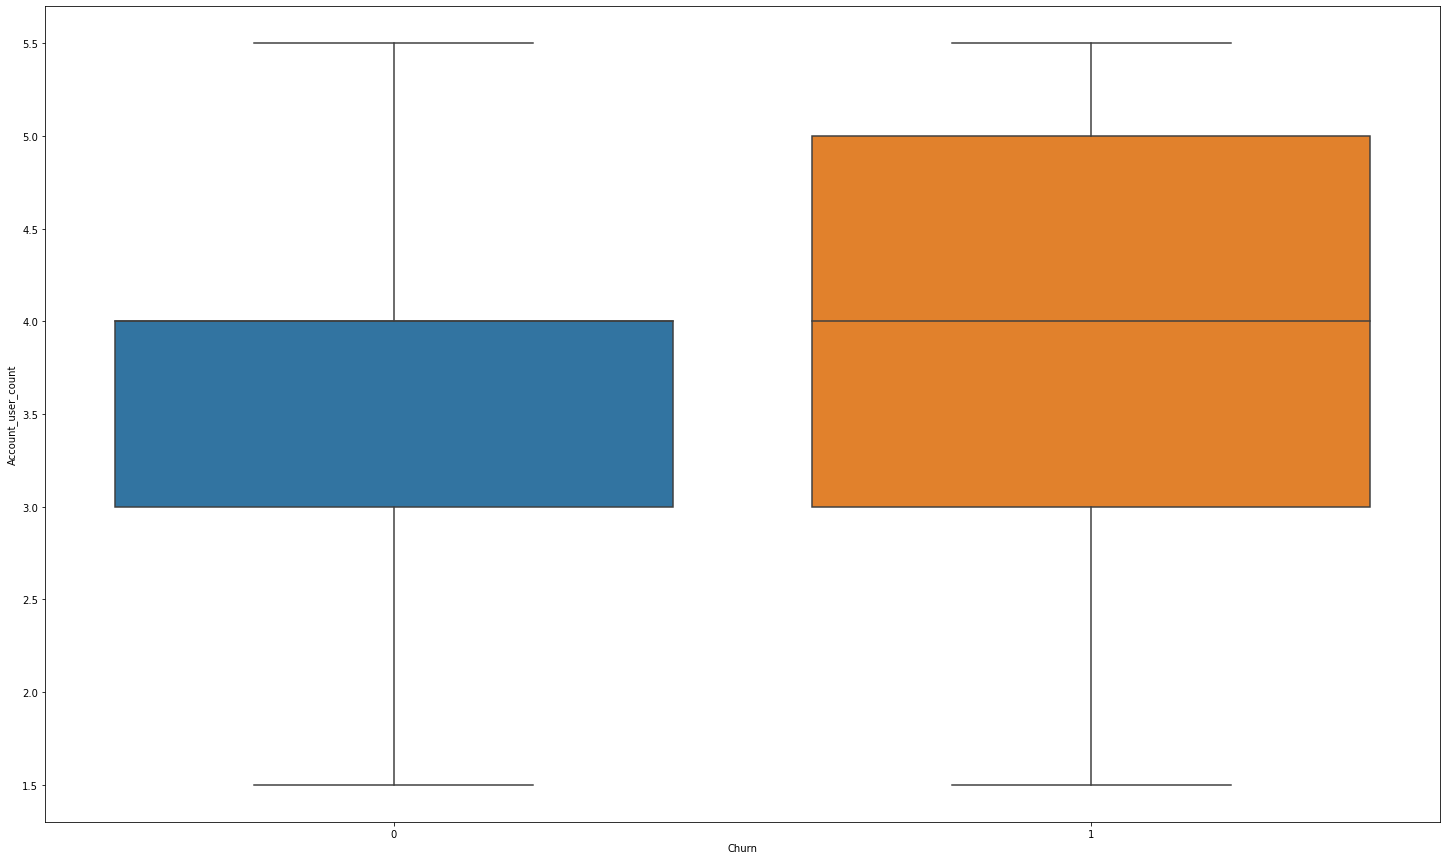

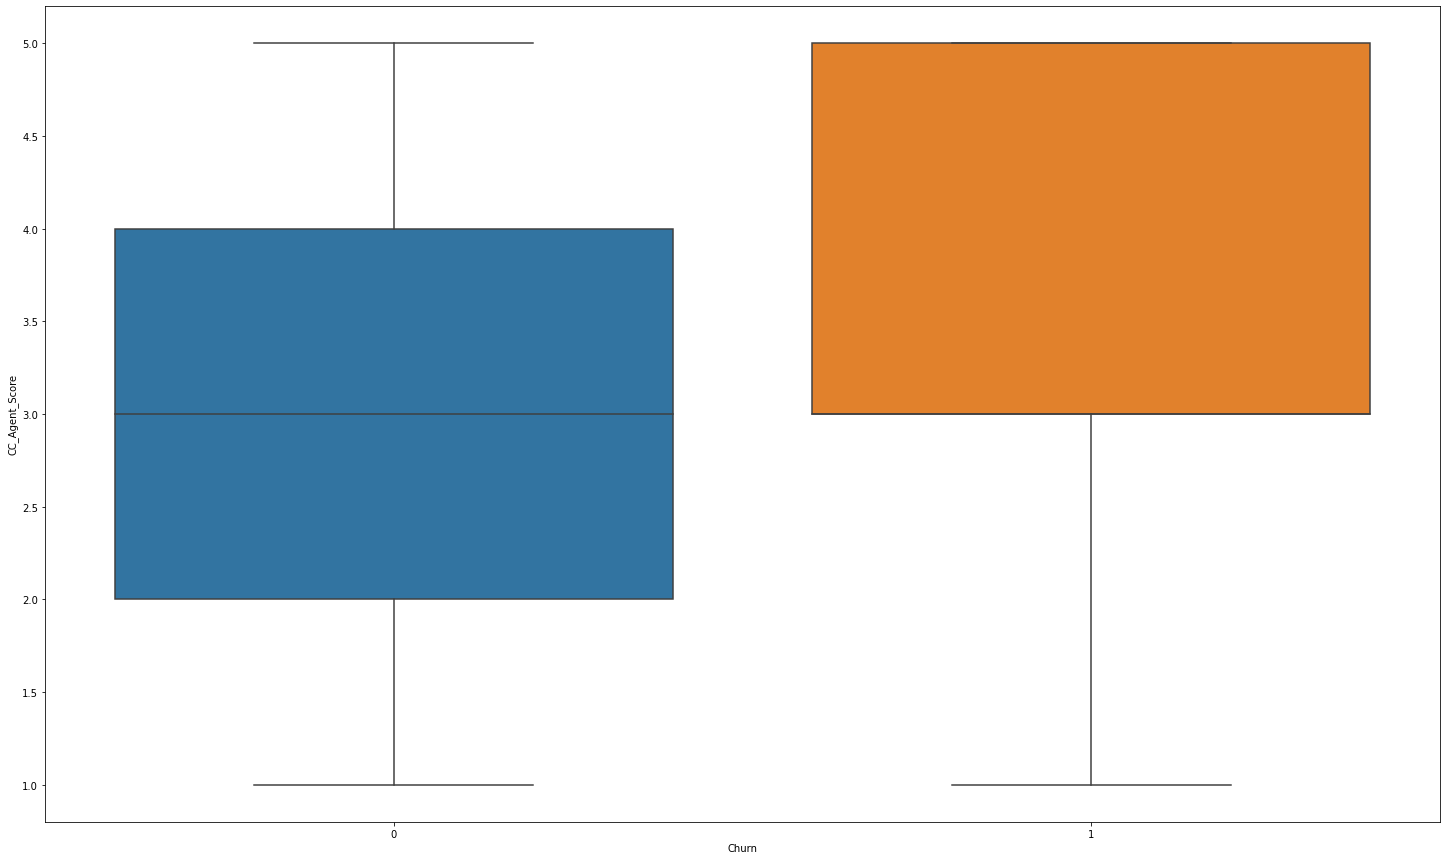

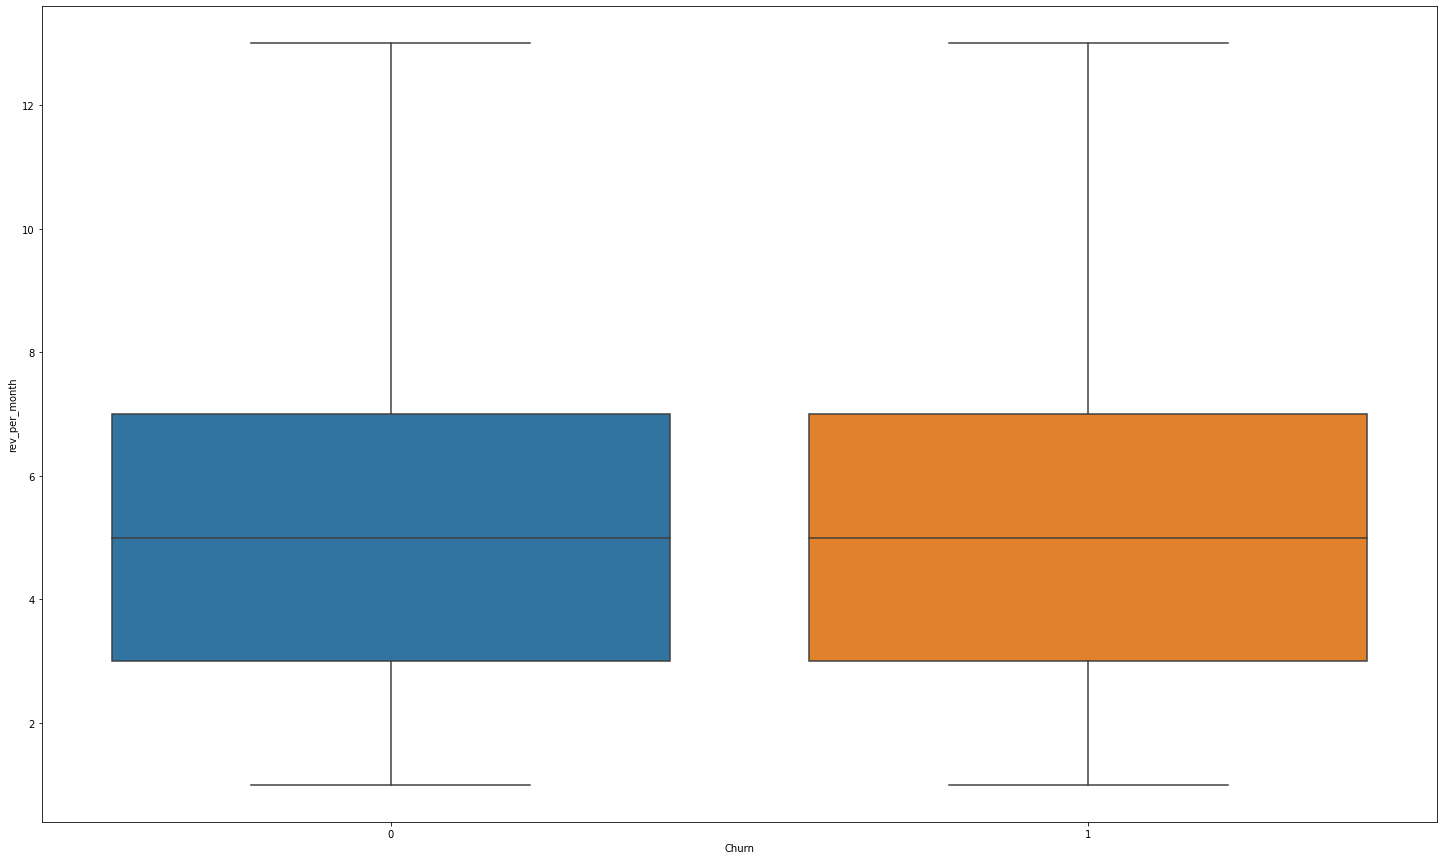

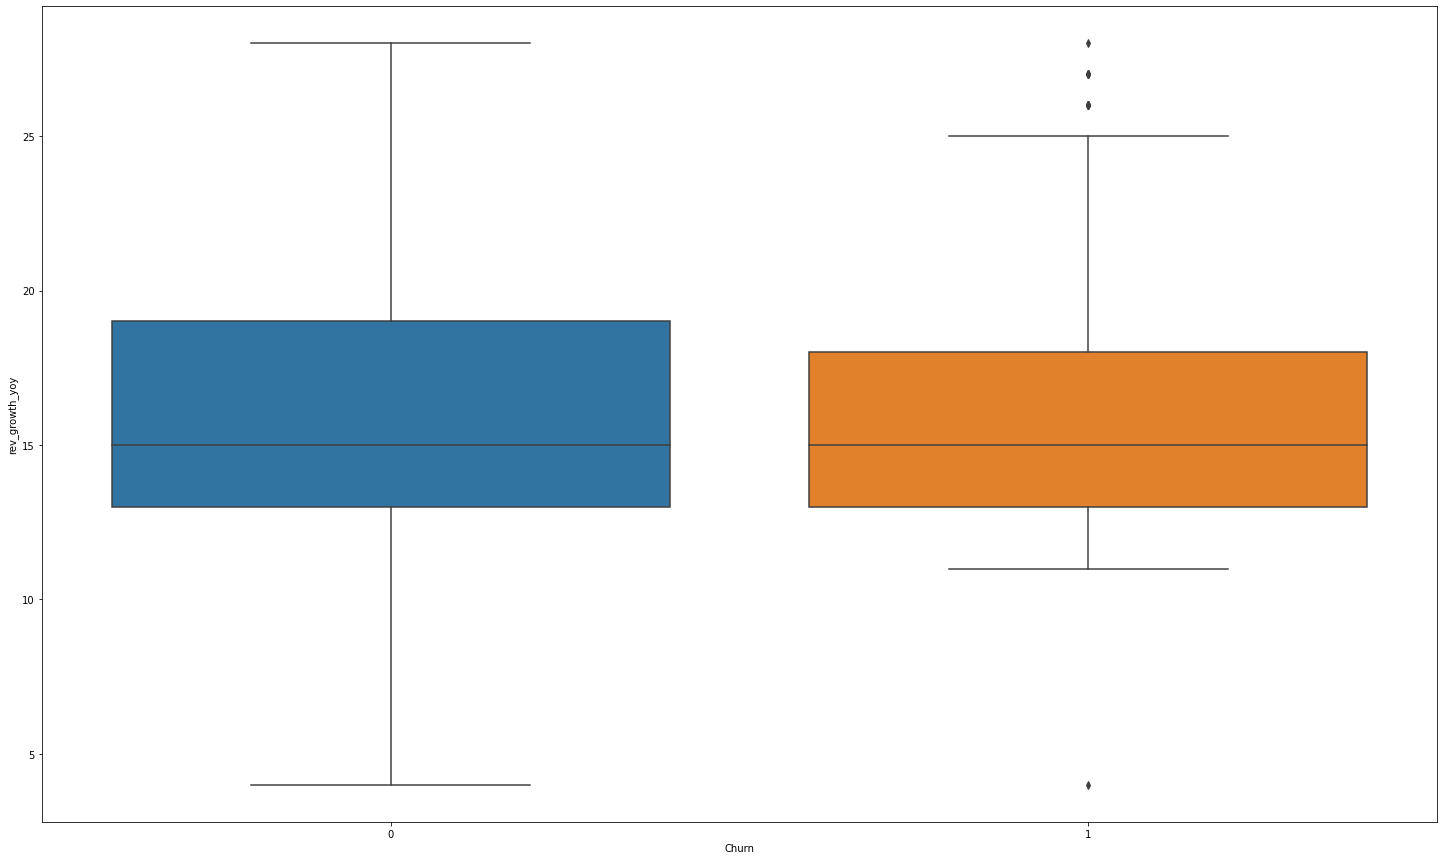

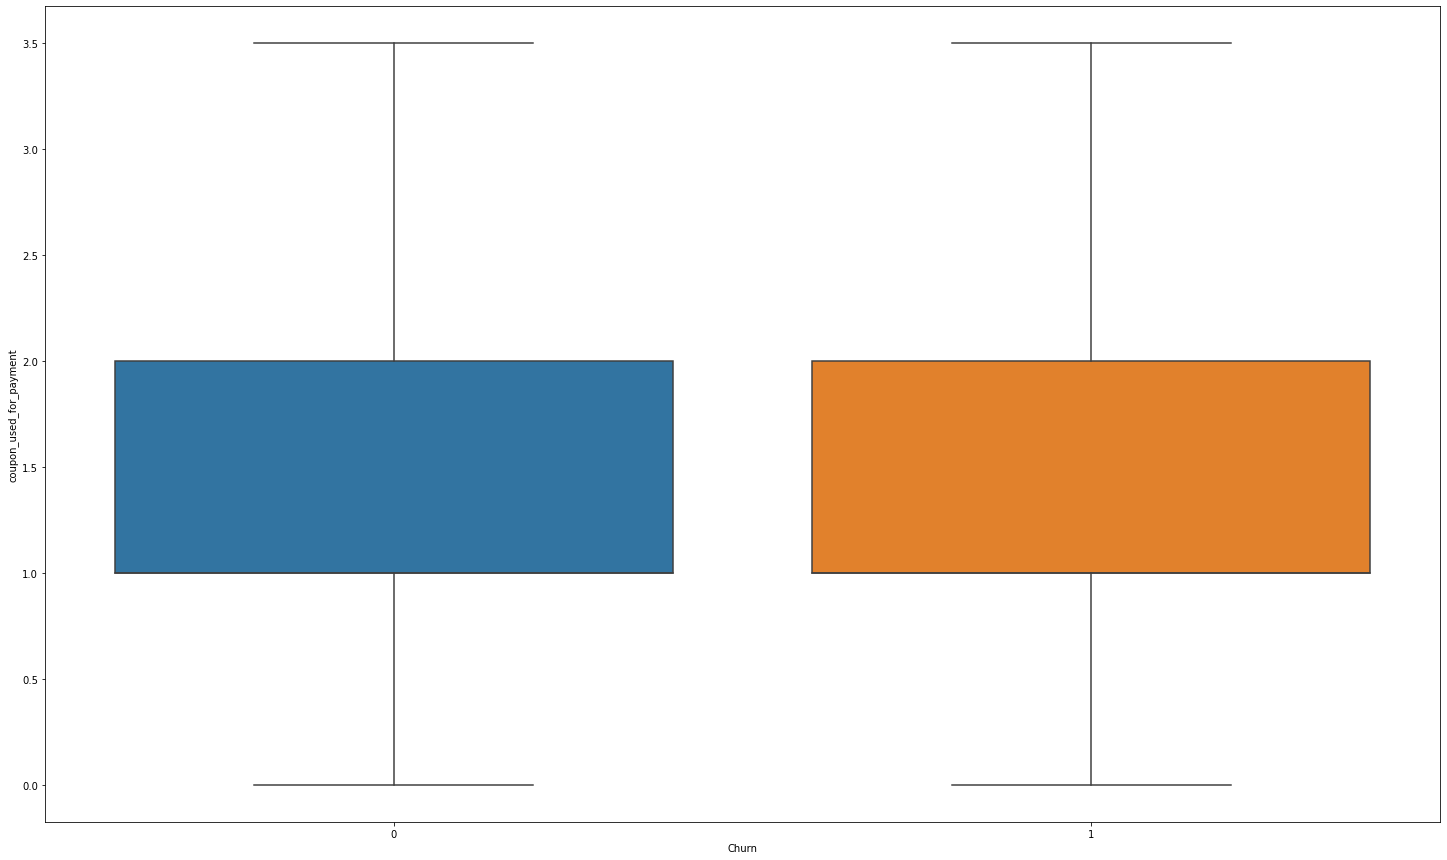

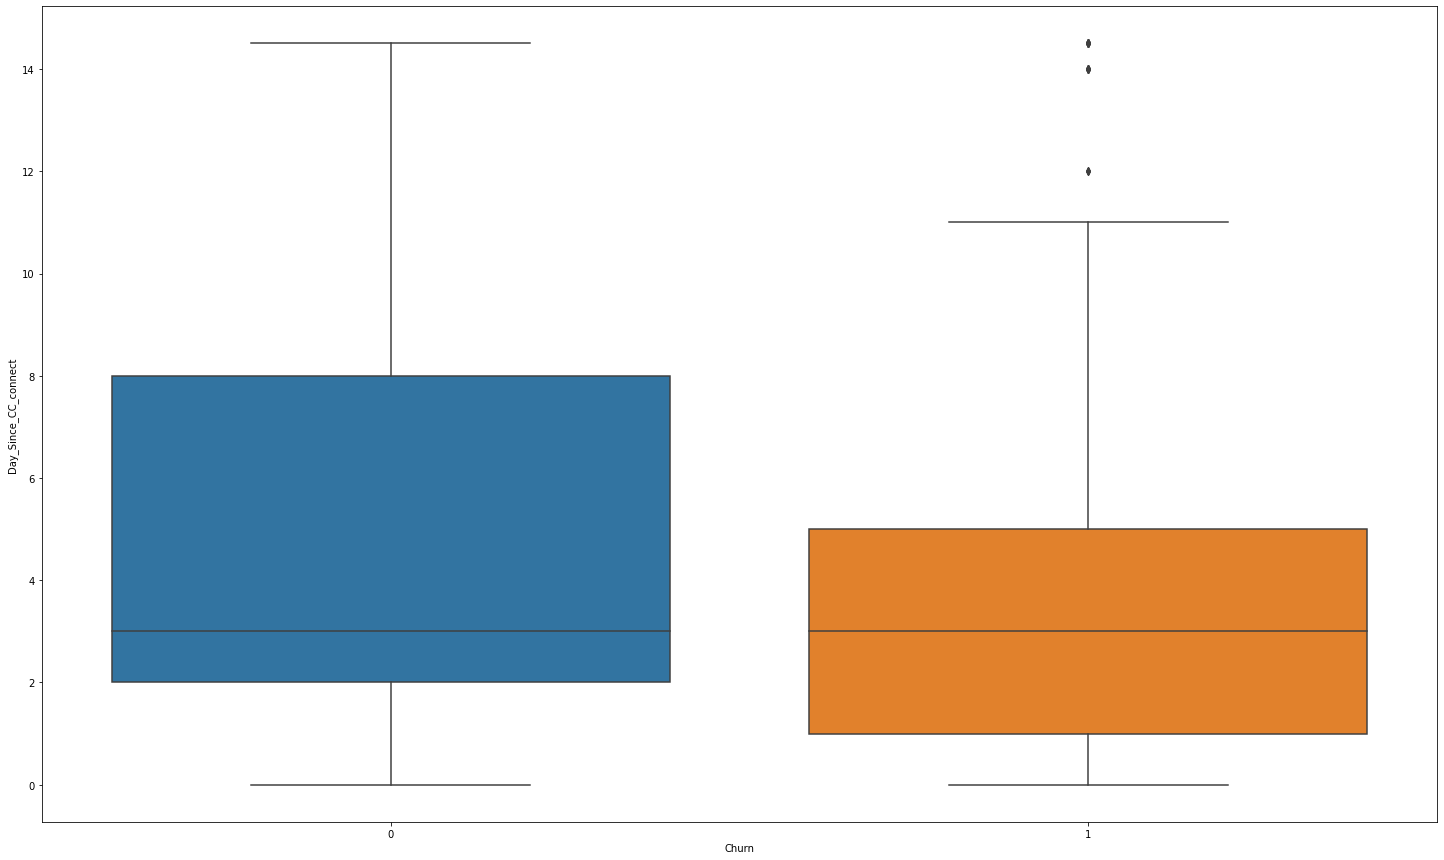

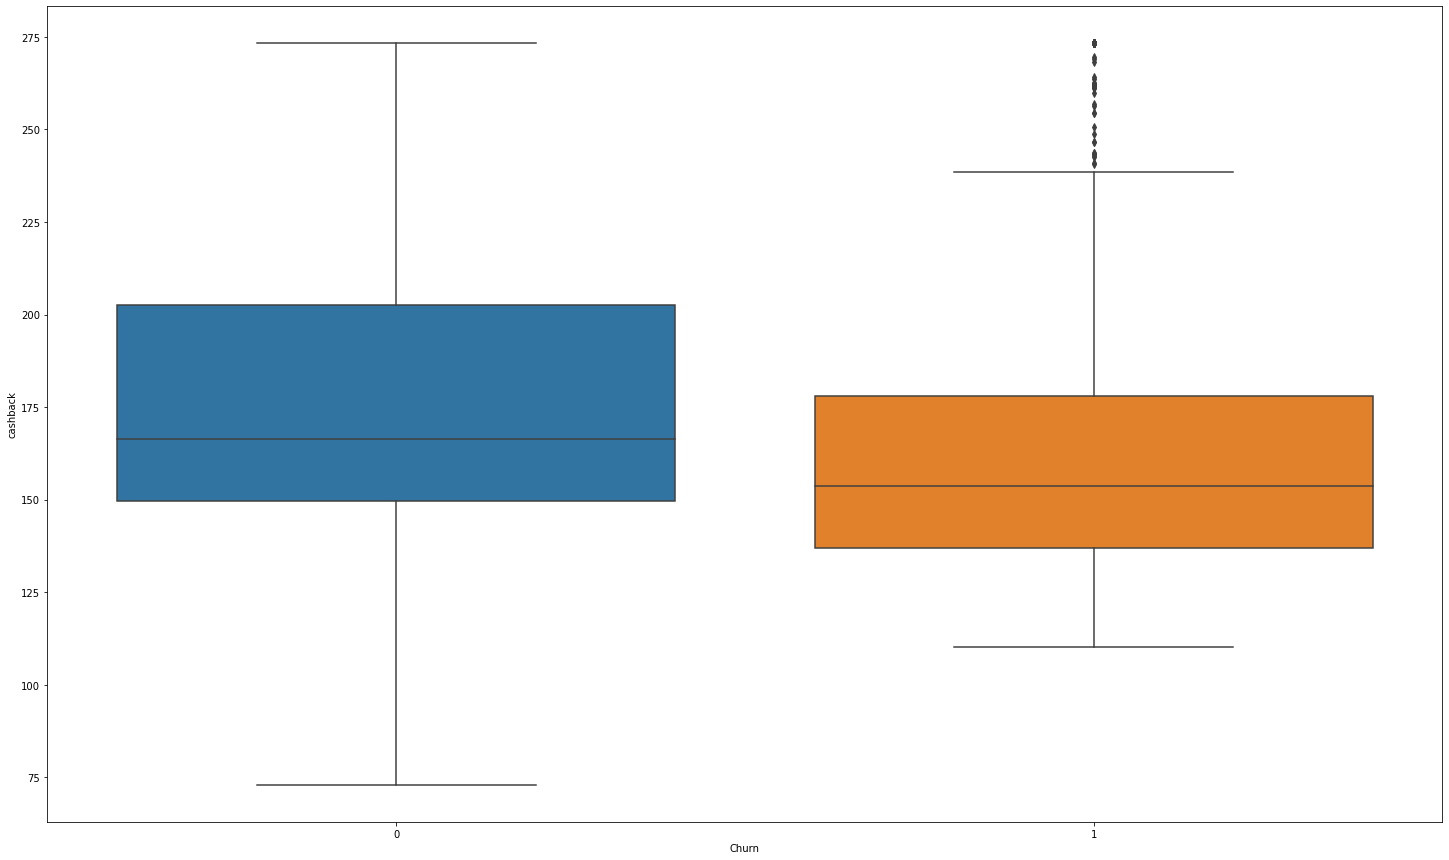

In [199]:
for col in cont:
    plt.figure(figsize=(25, 15))
    sns.boxplot(x="Churn", y=col, data=churn)

In [206]:
categorical_column

['Churn',
 'City_Tier',
 'Payment',
 'Gender',
 'account_segment',
 'Marital_Status',
 'Complain_ly',
 'Login_device']

categorical_column = [col for col in churn.columns if churn.dtypes[col] == 'object']
for column in churn[categorical_column]:
    print(column.upper(),': ',churn[column].nunique())
    print(churn[column].value_counts().sort_values())
    print('\n')

### Converting Object data type into Categorical

In [200]:
#label encoder
for column in categorical_column:
    if churn[column].dtype == 'object':
        churn[column] = pd.Categorical(churn[column]).codes 

In [201]:
churn.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4.0,2,6.0,2,0,3.0,3.0,3,2.0,2,9.0,1,11.0,1.0,5.0,159.93,1
1,1,0.0,0,8.0,4,1,3.0,4.0,2,3.0,2,7.0,1,15.0,0.0,0.0,120.90,1
2,1,0.0,0,30.0,2,1,2.0,4.0,2,3.0,2,6.0,1,14.0,0.0,3.0,165.25,1
3,1,0.0,2,15.0,2,1,2.0,4.0,3,5.0,2,8.0,0,23.0,0.0,3.0,134.07,1
4,1,0.0,0,12.0,1,1,2.0,3.0,2,5.0,2,3.0,0,11.0,1.0,3.0,129.60,1


In [202]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10946 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    10946 non-null  int8   
 1   Tenure                   10946 non-null  float64
 2   City_Tier                10946 non-null  int8   
 3   CC_Contacted_LY          10946 non-null  float64
 4   Payment                  10946 non-null  int8   
 5   Gender                   10946 non-null  int8   
 6   Service_Score            10946 non-null  float64
 7   Account_user_count       10946 non-null  float64
 8   account_segment          10946 non-null  int8   
 9   CC_Agent_Score           10946 non-null  float64
 10  Marital_Status           10946 non-null  int8   
 11  rev_per_month            10946 non-null  float64
 12  Complain_ly              10946 non-null  int8   
 13  rev_growth_yoy           10946 non-null  float64
 14  coupon_used_for_paymen

In [273]:
churn.columns

Index(['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

### Train Test Split

In [247]:
from sklearn.model_selection import train_test_split

In [248]:
#Extract x and y
y = churn['Churn']
X = churn.drop(['Churn'], axis=1)

In [249]:
import statsmodels.api as sm
result = sm.OLS(y, X).fit() 
print(result.summary()) 

                                 OLS Regression Results                                
Dep. Variable:                  Churn   R-squared (uncentered):                 -22.401
Model:                            OLS   Adj. R-squared (uncentered):            -22.437
Method:                 Least Squares   F-statistic:                             -615.4
Date:                Thu, 04 Mar 2021   Prob (F-statistic):                        1.00
Time:                        14:09:31   Log-Likelihood:                         -3294.4
No. Observations:               10946   AIC:                                      6623.
Df Residuals:                   10929   BIC:                                      6747.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [250]:
np.exp(result.params).sort_values(ascending=False)


Complain_ly                1.222467
Marital_Status             1.064706
Account_user_count         1.039792
City_Tier                  1.035493
CC_Agent_Score             1.032080
Gender                     1.027049
rev_per_month              1.012091
coupon_used_for_payment    1.011811
CC_Contacted_LY            1.002634
cashback                   0.999815
rev_growth_yoy             0.998357
Payment                    0.991535
Day_Since_CC_connect       0.990156
Tenure                     0.987641
Service_Score              0.986323
account_segment            0.975124
Login_device               0.965525
dtype: float64

from sklearn.ensemble import RandomForestClassifier
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
#Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(X, y)
#Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

In [251]:
#split data into 70% training and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.30, random_state=0)

In [252]:
# Checking dimensions on the train and test data
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (7662, 17)
X_test:  (3284, 17)
y_train:  (7662,)
y_test:  (3284,)


### Scaling the variables

In [253]:
from sklearn.preprocessing import StandardScaler

In [254]:
#Initialize an object for StandardScaler
sc = StandardScaler()

In [255]:
#Scale the training data
X_train = sc.fit_transform(X_train)

X_train

In [256]:
#Apply the transformation on the test data
X_test = sc.transform(X_test)

X_test

# Build Models

In [257]:
### Naive Bayes Model

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [258]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8728791438266771
[[5984  391]
 [ 583  704]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      6375
           1       0.64      0.55      0.59      1287

    accuracy                           0.87      7662
   macro avg       0.78      0.74      0.76      7662
weighted avg       0.87      0.87      0.87      7662



In [259]:
y_test.value_counts()

0    2729
1     555
Name: Churn, dtype: int64

In [260]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8718026796589525
[[2567  162]
 [ 259  296]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2729
           1       0.65      0.53      0.58       555

    accuracy                           0.87      3284
   macro avg       0.78      0.74      0.75      3284
weighted avg       0.86      0.87      0.87      3284



In [261]:
# Fit the Logistic Regression model
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2,random_state=1)
result=LR_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    4.8s finished


In [221]:
X.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

In [222]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, result.coef_[0][idx]))

The coefficient for Tenure is -1.6333903141192567
The coefficient for City_Tier is 0.33434108195143303
The coefficient for CC_Contacted_LY is 0.17465626523371874
The coefficient for Payment is -0.05748369050009859
The coefficient for Gender is 0.12911063757020072
The coefficient for Service_Score is -0.05090321081285272
The coefficient for Account_user_count is 0.33444530507961734
The coefficient for account_segment is -0.4419981475527567
The coefficient for CC_Agent_Score is 0.37457230085875737
The coefficient for Marital_Status is 0.3265041214584857
The coefficient for rev_per_month is 0.3712651903778539
The coefficient for Complain_ly is 0.7230923091202757
The coefficient for rev_growth_yoy is -0.09716417477859306
The coefficient for coupon_used_for_payment is 0.19624494413613489
The coefficient for Day_Since_CC_connect is -0.3772656610209452
The coefficient for cashback is -0.1520192217063278
The coefficient for Login_device is -0.19873630295480627


In [225]:
np.exp(result.coef_)

array([[0.19526644, 1.39701956, 1.19083681, 0.94413729, 1.137816  ,
        0.95037065, 1.39716517, 0.64275083, 1.45436925, 1.38611396,
        1.44956743, 2.06079599, 0.90740702, 1.21682492, 0.68573388,
        0.85897177, 0.81976603]])

In [226]:
import statsmodels.api as sm 
logit_model = sm.Logit(endog=y, exog=X).fit()

Optimization terminated successfully.
         Current function value: 0.310623
         Iterations 8


In [228]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                10946
Model:                          Logit   Df Residuals:                    10929
Method:                           MLE   Df Model:                           16
Date:                Wed, 03 Mar 2021   Pseudo R-squ.:                  0.3145
Time:                        12:15:11   Log-Likelihood:                -3400.1
converged:                       True   LL-Null:                       -4960.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Tenure                     -0.1735      0.006    -26.887      0.000      -0.186      -0.161
City_Tier                   0.3693      0.035     10.678      0.000       0.302       0.437


In [232]:
# get odds ratio
res=np.exp(logit_model.params)
res.sort_values(ascending=False)

Complain_ly                4.870000
Marital_Status             1.558736
City_Tier                  1.446774
Account_user_count         1.325246
CC_Agent_Score             1.265180
coupon_used_for_payment    1.229745
Gender                     1.200547
rev_per_month              1.139378
CC_Contacted_LY            1.019670
cashback                   0.989914
rev_growth_yoy             0.941550
Day_Since_CC_connect       0.911426
Payment                    0.900182
Service_Score              0.858547
Tenure                     0.840682
Login_device               0.603680
account_segment            0.603215
dtype: float64

In [233]:
## Performance Matrix on train data set
y_train_predict = LR_model.predict(X_train)
model_score = LR_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8846254241712347
[[6188  187]
 [ 697  590]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6375
           1       0.76      0.46      0.57      1287

    accuracy                           0.88      7662
   macro avg       0.83      0.71      0.75      7662
weighted avg       0.88      0.88      0.87      7662



In [234]:
## Performance Matrix on test data set
y_test_predict = LR_model.predict(X_test)
model_score = LR_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8309987819732034
[[2729    0]
 [ 555    0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2729
           1       0.00      0.00      0.00       555

    accuracy                           0.83      3284
   macro avg       0.42      0.50      0.45      3284
weighted avg       0.69      0.83      0.75      3284



In [227]:
## SVM 

from sklearn import svm

SVM_model= svm.SVC(random_state=1)
SVM_model.fit(X_train, y_train)

SVC(random_state=1)

In [228]:
## Performance Matrix on train data set
y_train_predict = SVM_model.predict(X_train)
model_score = SVM_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9420516836335161
[[6334   41]
 [ 403  884]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      6375
           1       0.96      0.69      0.80      1287

    accuracy                           0.94      7662
   macro avg       0.95      0.84      0.88      7662
weighted avg       0.94      0.94      0.94      7662



In [229]:
## Performance Matrix on test data set
y_test_predict = SVM_model.predict(X_test)
model_score = SVM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9244823386114495
[[2697   32]
 [ 216  339]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2729
           1       0.91      0.61      0.73       555

    accuracy                           0.92      3284
   macro avg       0.92      0.80      0.84      3284
weighted avg       0.92      0.92      0.92      3284



In [232]:
## Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [233]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.87548942834769
[[6199  176]
 [ 778  509]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6375
           1       0.74      0.40      0.52      1287

    accuracy                           0.88      7662
   macro avg       0.82      0.68      0.72      7662
weighted avg       0.86      0.88      0.86      7662



In [234]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8757612667478685
[[2669   60]
 [ 348  207]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2729
           1       0.78      0.37      0.50       555

    accuracy                           0.88      3284
   macro avg       0.83      0.68      0.72      3284
weighted avg       0.87      0.88      0.86      3284



In [256]:
## KNN Model

from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [257]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9780736100234926
[[6325   50]
 [ 118 1169]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6375
           1       0.96      0.91      0.93      1287

    accuracy                           0.98      7662
   macro avg       0.97      0.95      0.96      7662
weighted avg       0.98      0.98      0.98      7662



In [258]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9515834348355664
[[2678   51]
 [ 108  447]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2729
           1       0.90      0.81      0.85       555

    accuracy                           0.95      3284
   macro avg       0.93      0.89      0.91      3284
weighted avg       0.95      0.95      0.95      3284



MODEL TUNING - KNN Model - took more time to execute...

In [ ]:
#Ensemble models

In [264]:
## Ada Boost

from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [236]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8984599321326024
[[6120  255]
 [ 523  764]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6375
           1       0.75      0.59      0.66      1287

    accuracy                           0.90      7662
   macro avg       0.84      0.78      0.80      7662
weighted avg       0.89      0.90      0.89      7662



In [237]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8970767356881851
[[2627  102]
 [ 236  319]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2729
           1       0.76      0.57      0.65       555

    accuracy                           0.90      3284
   macro avg       0.84      0.77      0.80      3284
weighted avg       0.89      0.90      0.89      3284



In [238]:
## XGBoost
import xgboost as xgb
XGB_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_model.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [239]:
## Performance Matrix on train data set
y_train_predict = XGB_model.predict(X_train)
model_score = XGB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9250848342469329
[[6238  137]
 [ 437  850]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      6375
           1       0.86      0.66      0.75      1287

    accuracy                           0.93      7662
   macro avg       0.90      0.82      0.85      7662
weighted avg       0.92      0.93      0.92      7662



In [240]:
## Performance Matrix on test data set
y_test_predict = XGB_model.predict(X_test)
model_score = XGB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9095615103532277
[[2655   74]
 [ 223  332]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2729
           1       0.82      0.60      0.69       555

    accuracy                           0.91      3284
   macro avg       0.87      0.79      0.82      3284
weighted avg       0.90      0.91      0.90      3284



In [299]:
X.columns

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Payment', 'Gender',
       'Service_Score', 'Account_user_count', 'account_segment',
       'CC_Agent_Score', 'Marital_Status', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Login_device'],
      dtype='object')

In [279]:
from matplotlib import pyplot
# define the model
#importance_types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
#f = 'gain'

xgbmodel = XGBClassifier()
# fit the model
xgbmodel.fit(X, y)
# get importance
#importance = xgbmodel.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
#    print('Feature: %0d, Score: %.5f' %(i,v))
# plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Text(0.5, 0, 'Xgboost Feature Importance')

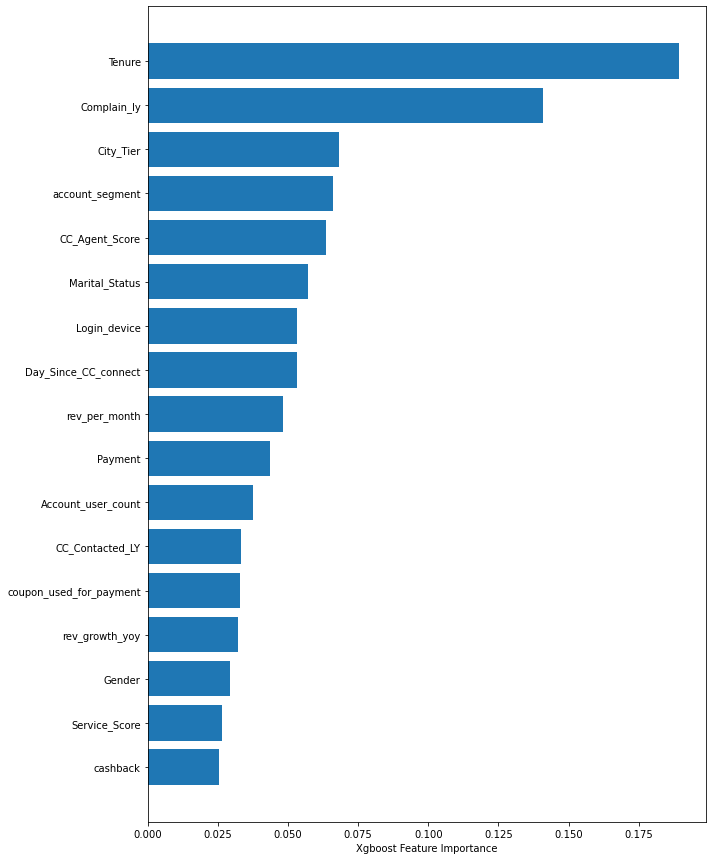

In [292]:
sorted_idx = xgbmodel.feature_importances_.argsort()
plt.figure(figsize=(10,15))
plt.barh(X.columns[sorted_idx], xgbmodel.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [ ]:
#Model tuning

In [281]:
from xgboost import XGBClassifier
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [282]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [285]:
grid_search_XGB = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [286]:
xgb_Grid = grid_search_XGB.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   28.1s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  1.6min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:  4.3min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed:  8.1min
[Parallel(n_jobs=10)]: Done 960 out of 960 | elapsed: 10.7min finished


In [293]:
print(xgb_Grid.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=180, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)


In [294]:
mdl_best=xgb_Grid.best_estimator_

In [295]:
## Performance Matrix on train data set
y_train_predict = xgb_Grid.predict(X_train)
model_score = xgb_Grid.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6375    0]
 [   0 1287]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6375
           1       1.00      1.00      1.00      1287

    accuracy                           1.00      7662
   macro avg       1.00      1.00      1.00      7662
weighted avg       1.00      1.00      1.00      7662



In [296]:
## Performance Matrix on test data set
y_test_predict = xgb_Grid.predict(X_test)
model_score = xgb_Grid.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9916631178631911
[[2705   24]
 [  66  489]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2729
           1       0.95      0.88      0.92       555

    accuracy                           0.97      3284
   macro avg       0.96      0.94      0.95      3284
weighted avg       0.97      0.97      0.97      3284



feat_imp = pd.DataFrame(list(zip(churn.columns,mdl_best.feature_importances_)),columns=["Feature","Importance"]).sort_values(by="Importance",ascending=False)
fig_store = plt.figure(figsize=(10,20))
sns.barplot(y="Feature",x="Importance",data = feat_imp,orient="h")
plt.show()

In [295]:
#Lets test our optimised model with the data:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

cv_strat = RepeatedStratifiedKFold(n_splits=5,n_repeats=20)
scores = cross_validate(mdl_best,X.values,y.values,cv=cv_strat,verbose=3,n_jobs=-1,return_train_score=True,
                        scoring={"roc_auc":"roc_auc",
                                 "recall":"recall",
                                 "precision":"precision",
                                 "accuracy":"accuracy",
                                 "balanced_accuracy":"balanced_accuracy",
                                 "average_precision":"average_precision"}) 

pd.DataFrame(pd.DataFrame(scores).mean(),columns=["Score"]).drop(["fit_time","score_time"])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished


,Score
test_roc_auc,0.993644
train_roc_auc,1.000000
test_recall,0.895006
train_recall,1.000000
test_precision,0.962776
train_precision,1.000000
test_accuracy,0.976489
train_accuracy,1.000000
test_balanced_accuracy,0.943991
train_balanced_accuracy,1.000000


In [244]:
## Decision Tree

from sklearn import tree
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [245]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6375    0]
 [   0 1287]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6375
           1       1.00      1.00      1.00      1287

    accuracy                           1.00      7662
   macro avg       1.00      1.00      1.00      7662
weighted avg       1.00      1.00      1.00      7662



In [246]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9387941534713764
[[2644   85]
 [ 116  439]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      2729
           1       0.84      0.79      0.81       555

    accuracy                           0.94      3284
   macro avg       0.90      0.88      0.89      3284
weighted avg       0.94      0.94      0.94      3284



In [247]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [248]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6375    0]
 [   0 1287]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6375
           1       1.00      1.00      1.00      1287

    accuracy                           1.00      7662
   macro avg       1.00      1.00      1.00      7662
weighted avg       1.00      1.00      1.00      7662



In [249]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.968026796589525
[[2708   21]
 [  84  471]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2729
           1       0.96      0.85      0.90       555

    accuracy                           0.97      3284
   macro avg       0.96      0.92      0.94      3284
weighted avg       0.97      0.97      0.97      3284



In [250]:
## Bagging

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [251]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[6375    0]
 [   0 1287]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6375
           1       1.00      1.00      1.00      1287

    accuracy                           1.00      7662
   macro avg       1.00      1.00      1.00      7662
weighted avg       1.00      1.00      1.00      7662



In [252]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9704628501827041
[[2699   30]
 [  67  488]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2729
           1       0.94      0.88      0.91       555

    accuracy                           0.97      3284
   macro avg       0.96      0.93      0.95      3284
weighted avg       0.97      0.97      0.97      3284



In [265]:

from sklearn.model_selection import GridSearchCV


In [266]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   25.0s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [267]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=93, random_state=42)

In [268]:
## Performance Matrix on train data set
y_train_predict = grid_search_cv.predict(X_train)
model_score =grid_search_cv.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9436178543461238
[[6252  123]
 [ 309  978]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      6375
           1       0.89      0.76      0.82      1287

    accuracy                           0.94      7662
   macro avg       0.92      0.87      0.89      7662
weighted avg       0.94      0.94      0.94      7662



In [269]:
## Performance Matrix on test data set
y_test_predict = grid_search_cv.predict(X_test)
model_score = grid_search_cv.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9186967113276492
[[2636   93]
 [ 174  381]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2729
           1       0.80      0.69      0.74       555

    accuracy                           0.92      3284
   macro avg       0.87      0.83      0.85      3284
weighted avg       0.92      0.92      0.92      3284



In [ ]:
#Model Tuning - RandomForestClassifier

In [270]:
param_grid = {
    'max_depth': [7],
    'max_features': [8],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100]
}

rfcl = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [271]:
Bagging_model_grid=BaggingClassifier(base_estimator=grid_search_rf,random_state=1)


In [296]:
rf_grid_model=grid_search_rf.fit(X_train,y_train)

In [297]:
#Lets test our optimised model with the data:
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

cv_strat = RepeatedStratifiedKFold(n_splits=5,n_repeats=20)
scores = cross_validate(rf_grid_model,X.values,y.values,cv=cv_strat,verbose=3,n_jobs=-1,return_train_score=True,
                        scoring={"roc_auc":"roc_auc",
                                 "recall":"recall",
                                 "precision":"precision",
                                 "accuracy":"accuracy",
                                 "balanced_accuracy":"balanced_accuracy",
                                 "average_precision":"average_precision"}) 

pd.DataFrame(pd.DataFrame(scores).mean(),columns=["Score"]).drop(["fit_time","score_time"])

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  8.6min finished


,Score
test_roc_auc,0.938369
train_roc_auc,0.954693
test_recall,0.587434
train_recall,0.620026
test_precision,0.807875
train_precision,0.847313
test_accuracy,0.906998
train_accuracy,0.917247
test_balanced_accuracy,0.779545
train_balanced_accuracy,0.798705


In [273]:
## Performance Matrix on train data set
y_train_predict = grid_search_rf.predict(X_train)
model_score =grid_search_rf.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9132080396763247
[[6225  150]
 [ 515  772]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6375
           1       0.84      0.60      0.70      1287

    accuracy                           0.91      7662
   macro avg       0.88      0.79      0.82      7662
weighted avg       0.91      0.91      0.91      7662



In [274]:
## Performance Matrix on test data set
y_test_predict = grid_search_rf.predict(X_test)
model_score = grid_search_rf.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9052984165651644
[[2658   71]
 [ 240  315]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2729
           1       0.82      0.57      0.67       555

    accuracy                           0.91      3284
   macro avg       0.87      0.77      0.81      3284
weighted avg       0.90      0.91      0.90      3284

